# Quantum Amplitude Amplification, Estimation and Grover Search

In this tutorial, we shall introduce ourselves to algorithms that have the following common main principle: manipulating amplitudes of quantum states. The first part will deal with amplitude amplification (QAA), and the second part will discuss amplitude estimation (QAE).

---

## Part I: Quantum Amplitude Amplification and Grover Search

Quantum amplitude amplification is an algorithm that amplifies the amplitude of a particular state in a superposition state.  
It is the core concept behind the design of Grover's algorithm.

### 1.1. Amplitude Amplification Algorithm (QAA)

Regarding the word "amplitude", the coefficients for each state are called **amplitude** and the probability is called **probability amplitude**.

The main idea behind amplifying amplitudes is to increase the coefficient of a particular quantum state via some operations on a superposition state, as demonstrated below:

$$
H \lvert 0 \rangle \otimes H \lvert 0 \rangle = \frac{1}{2} (\lvert 00 \rangle + \lvert 01 \rangle + \lvert10 \rangle + \lvert 11 \rangle) \xrightarrow{\text{Amplitude amplification}} \lvert 00 \rangle
$$

In this case, the probability amplitudes on the left side of the arrow are all $1/4$, while the state on the right side has probability amplitude $1$ for $\lvert 00\rangle$.
This means that the probability of measuring the state $\lvert 00\rangle$ has been _amplified_ from $1/4$ to $1$, thus explaining the name "QAA".

The following figure illustrates how the algorithm works on quantum states.

<img width="30%" src="https://upload.wikimedia.org/wikipedia/commons/1/16/Grovers_algorithm_geometry.png">

Ref: https://en.wikipedia.org/wiki/Grover%27s_algorithm

First, let's explain the symbols appearing in the diagram above.

+ Suppose $\lvert s\rangle$ is an arbitrary initial state.
For example, $\lvert s\rangle$ can be the uniform superposition of all $2^n$ possible states on $n$ qubits. Such an initial state is commonly used in Grover's algorithm.

$$
\lvert s \rangle = \otimes^n  H  \lvert 0 \rangle =\frac{1}{\sqrt{2^n}}\sum^{2^n}_{x\in \{0, 1\}^n}\lvert x \rangle
$$

+ Of all these states, $\lvert \omega\rangle$ is a particular state we want to amplify. Suppose that $\lvert \omega\rangle$ is the following state, with a $1$ at the $x$'th position and $0$ elsewhere:

$$
\lvert \omega \rangle = \frac 1{\sqrt{2^n}}\lvert 00...010...00\rangle
$$

(Strictly speaking, $\omega$ is not a quantum state as defined above since its norm is not $1$, but we use this notation only to simplify our calculations.)

+ Let $\lvert s'\rangle = \lvert s\rangle-\lvert \omega\rangle$, then it can be seen that the vectors $s'$ and $\omega$ are perpendicular.

$$
\lvert s' \rangle = \lvert s \rangle - \lvert \omega \rangle = \lvert \omega^{\perp} \rangle
$$

+ $U_{\omega}$ is a matrix that inverts $\psi$ on the $\lvert s'\rangle$ axis.
In other words, rotate $\psi$ by $-\phi$.

$$
U_{\omega} \lvert \psi \rangle = \cos(-\phi) {\lvert s' \rangle} + \sin(-\phi) {\lvert \omega \rangle} = \cos(\phi) {\lvert s' \rangle} - \sin(\phi) {\lvert \omega \rangle}
$$

+ $U_s$ is a matrix that inverts $\psi$ around $\lvert s\rangle$.

$$
U_s \lvert \psi \rangle = \cos \bigg\{ \frac{\theta}{2} + \big(\frac{\theta}{2} - \phi \big) \bigg\} {\lvert s' \rangle} + \sin \bigg\{ \frac{\theta}{2} + \big(\frac{\theta}{2} - \phi \big) \bigg\}{\lvert \omega \rangle} = \cos(\theta - \phi){\lvert s' \rangle} + \sin(\theta - \phi){\lvert \omega \rangle}
$$

### 1.2. Outline of QAA

The algorithm is outlined below.

1. Invert $\lvert s\rangle$ around $\lvert s' \rangle$ using $U_{\omega}$. Mathematically, $U_{\omega}$ flips the sign of $\lvert \omega\rangle$ in the uniform superposition $\lvert s\rangle$.

2. Invert $U_{\omega}\lvert s\rangle$ around $\lvert s\rangle$ using $U_s$.

We will explain the above process in detail.

#### 1. Invert around $\lvert s' \rangle$

Using $\theta$ as shown in the figure above, we describe $\lvert s \rangle$ as following.

$$
\lvert s \rangle = \cos\bigl(\frac{\theta}{2}\bigr){\lvert s' \rangle} - \sin\bigl(\frac{\theta}{2}\bigr) {\lvert \omega \rangle}
$$

The coefficients are given by:

$$
\cos\bigl( \frac{\theta}{2} \bigr) = \sqrt{\frac{2^n-1}{2^n}},\ \ \ \  \sin\bigl( \frac{\theta}{2} \bigr) = \sqrt{\frac{1}{2^n}}
$$

Using $U_{\omega}$, fold $\lvert s \rangle$ around $\lvert s' \rangle$.  
From the above figure, described as follows

$$
U_{\omega} \lvert s \rangle = \cos\bigl(-\frac{\theta}{2}\bigr){\lvert s' \rangle} + \sin\bigl(-\frac{\theta}{2}\bigr){\lvert \omega \rangle} = \cos\bigl(\frac{\theta}{2}\bigr){\lvert s' \rangle} - \sin\bigl(\frac{\theta}{2}\bigr){\lvert \omega \rangle}
$$

Since we are only working on $\lvert \omega \rangle$ for this operation, we can see that $U_{\omega}$ flips the sign of $\lvert \omega\rangle$ in the uniform superposition $\lvert s\rangle$. It is called the _Oracle_.

#### 2. Invert around $\lvert s \rangle$
Using $U_s$, fold $U_{\omega}\lvert s \rangle$ around $\lvert s \rangle$.

$$
U_s U_{\omega} \lvert s\rangle = U_s\biggl( \cos\bigl(-\frac{\theta}{2}\bigr){\lvert s' \rangle} + \sin\bigl(-\frac{\theta}{2}\bigr){\lvert \omega \rangle}  \biggr)
$$

Since we need to rotate $2\theta$ here,

$$
U_s U_{\omega} \lvert s\rangle =  \cos\bigl(\frac{3}{2}\theta\bigr){\lvert s' \rangle} + \sin\bigl(\frac{3}{2}\theta\bigr){\lvert \omega \rangle}
$$

Specifically, $\cos$ and $\sin$ are obtained from the additive theorem.

$$
\cos \frac{3}{2}\theta = \bigl( 1-\frac{4}{2^n} \bigr) \sqrt{\frac{2^n-1}{2^n}},\ \ \ \ \sin \frac{3}{2}\theta = \bigl( 3-\frac{4}{2^n} \bigr) \sqrt{\frac{1}{2^n}}
$$

Thus, using $\lvert s' \rangle$, $\lvert \omega \rangle$, we get

$$
U_s U_{\omega} \lvert s\rangle =  \bigl(1 - \frac{4}{2^n}\bigr)\lvert s' \rangle + \bigl(3 - \frac{4}{2^n}\bigr)\lvert \omega \rangle
$$

This operation makes $\lvert \omega \rangle$ of the $2^n$ amplitudes about three times larger than the others.  
We were able to amplify the amplitude by the above.

### 1.3. Circuit Implementation of QAA
Let's implement a circuit for QAA on 2 qubits using blueqat.
The possible states for two qubits are $00, 01, 10$ and $11$. Now we want to amplify a specific state, $\lvert \omega \rangle$.

#### 1. Invert $\lvert s \rangle$ around $\lvert s' \rangle$ using $U_{\omega}$.

First, we need to realize a gate $U_{\omega}$ that reverses the state on the axis $\lvert s' \rangle$ perpendicular to $\lvert \omega \rangle$. 

To do it, we prepare a diagonal matrix which is one element is -1 and others are 1.  
By using H gate, CZ gate and S gate we can realize it. We shall go over the steps one-by-one below. In each step, we'll use the function `Circuit().run_with_sympy_unitary()` to print the matrix of the transformation given by the circuit.

Here we show 4 possible circuits corresponding to the four possible binary states. In the diagrams, $\ast$ denotes control.

In [1]:
# !pip install blueqat
from blueqat import Circuit

In [2]:
'''
#marked state is 11

-------*-----
-------Z-----
'''

Circuit(2).cz[0,1].run_with_sympy_unitary()

Matrix([
[1, 0, 0,  0],
[0, 1, 0,  0],
[0, 0, 1,  0],
[0, 0, 0, -1]])

In [3]:
'''
#marked state is 01
 
----S--*--S---
-------Z-------
'''

Circuit(2).s[0].cz[0,1].s[0].run_with_sympy_unitary()

Matrix([
[1,  0, 0, 0],
[0, -1, 0, 0],
[0,  0, 1, 0],
[0,  0, 0, 1]])

In [4]:
'''
#marked state is 10
 
-------*------
----S--Z--S---
'''

Circuit(2).s[1].cz[0,1].s[1].run_with_sympy_unitary()

Matrix([
[1, 0,  0, 0],
[0, 1,  0, 0],
[0, 0, -1, 0],
[0, 0,  0, 1]])

In [5]:
'''
#marked state is 00
 
----S--*--S--
----S--Z--S--
'''

Circuit(2).s[:].cz[0,1].s[:].run_with_sympy_unitary()

Matrix([
[1,  0,  0,  0],
[0, -1,  0,  0],
[0,  0, -1,  0],
[0,  0,  0, -1]])

In all these cases, the circuits we created flips the amplitude of the marked state $\omega$. Here we ignore global phase, meaning that flipping all states other than $\omega$ is the same as flipping only $\omega$.

#### 2. Invert $U_{\omega}\lvert s \rangle$ around $\lvert s \rangle$ using $U_s$.

Here we think about $U_s$.

If we separate $\lvert s \rangle = \lvert s' \rangle + \lvert \omega \rangle$ from the definition of $\lvert s \rangle$, then $U_{\omega}$ is simply

$$
U_{\omega} (\lvert s' \rangle + \lvert \omega \rangle) = \lvert s' \rangle - \lvert \omega \rangle
$$

This means that we can use gates that change sign only for certain states, such as Z and CZ gates.

Thinking geometrically from the above figure, $U_s$ is described as follows.

$$
\begin{align}
U_s U_{\omega} \lvert s \rangle &= 2(\langle s \lvert U_{\omega} \rvert s \rangle \rvert s \rangle - U_{\omega}\lvert s \rangle) + U_{\omega}\lvert s \rangle \\
&= 2\lvert s \rangle \langle s \lvert U_{\omega} \rvert s \rangle - U_{\omega}\lvert s \rangle \\
&= (2\lvert s\rangle \langle s\rvert - I) U_{\omega}\lvert s \rangle
\end{align}
$$

So $U_s = 2\lvert s\rangle \langle s\rvert - I$.

Furthermore, in the case initial state $\lvert s \rangle = \otimes^n  H  \lvert 0 \rangle$, $U_s$ can be decomposed as follows.

$$
2\lvert s\rangle \langle s\rvert - I = 2H^{\otimes n}\lvert 0^n\rangle \langle 0^n\rvert H^{\otimes n} - I = H^{\otimes n} (2\lvert 0^n\rangle \langle 0^n\rvert - I) H^{\otimes n}\ \ \ \ (\lvert 0^n \rangle = \lvert 00\cdots 00 \rangle)
$$

Here, we can write $2\lvert 0^n\rangle \langle 0^n\rvert - I$ as

$$
2\lvert 0^n\rangle \langle 0^n\rvert - I = 
    \begin{pmatrix}
      -1 & 0 & 0 & \ldots & 0 & 0 \\
      0 & 1 & 0 & \ldots & 0 & 0 \\
      0 & 0 & 1 & \ldots & 0 & 0 \\
      \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
      0 & 0 & 0 & \ldots & 1 & 0 \\
      0 & 0 & 0 & \ldots & 0 & 1
    \end{pmatrix}
$$

We can describe it as following.
$$
XZX =
    \begin{pmatrix}
      -1 & 0 \\
      0 & 1
    \end{pmatrix}
$$

$$
2\lvert 0^n\rangle \langle 0^n\rvert - I = X^{\otimes n}C^n ZX^{\otimes n}
$$

We can implement this circuit using blueqat:

In [6]:
'''
--H-X-*-X-H--
--H-X-Z-X-H--
'''

Circuit(2).h[:].x[:].cz[0,1].x[:].h[:].run_with_sympy_unitary()

Matrix([
[ 1/2, -1/2, -1/2, -1/2],
[-1/2,  1/2, -1/2, -1/2],
[-1/2, -1/2,  1/2, -1/2],
[-1/2, -1/2, -1/2,  1/2]])

Now, we have the full circuit.

In [7]:
#Amplitude amplification
a = Circuit(2).h[:].x[:].cz[0,1].x[:].h[:].m[:]

'''
#Circuit amplifying state 00
       oracle
     ---------
--H--|S--*--S|----H-X-*-X-H--
--H--|S--Z--S|----H-X-Z-X-H--
     ---------
'''

(Circuit(2).h[:].s[:].cz[0,1].s[:] + a).run(shots=100)

Counter({'00': 100})

We can simply construct circuits amplifying the other states using the other oracles constructed earlier.

### 1.2. Grover's Algorithm
Grover's algorithm is a search algorithm that finds out a data entry efficiently from a list of unstructured data.

The algorithm iterates through quantum amplitude amplification to bring the initial state $\lvert s\rangle$ closer to the state we are looking for $\lvert \omega\rangle$.

$$
\lvert s \rangle = \cos\bigl(\frac{\theta}{2}\bigr) {\lvert s' \rangle} - \sin\bigl(\frac{\theta}{2}\bigr) {\lvert \omega \rangle}
$$

From the above equation, if we perform amplitude amplification once, we get

$$
U_s U_{\omega} \lvert s\rangle =  \cos\bigl(\frac{3}{2}\theta\bigr){\lvert s' \rangle} + \sin\bigl(\frac{3}{2}\theta\bigr){\lvert \omega \rangle}
$$

Therefore, if we perform amplitude amplification $n$ times, we get

$$
\cos\bigl(\frac{1}{2}\theta + n\theta \bigr){\lvert s' \rangle} + \sin\bigl(\frac{1}{2}\theta + n\theta\bigr){\lvert \omega \rangle} = \cos\biggl\{\bigl(\frac{1}{2} + n \bigr)\theta \biggr\} {\lvert s' \rangle} + \sin\biggl\{\bigl(\frac{1}{2} + n \bigr)\theta \biggr\}{\lvert \omega \rangle}
$$

As the amplitude is amplified, the initial state $\lvert s\rangle$ in the above figure becomes closer and closer to $\lvert \omega\rangle$.
In other words, the probability amplitude of $\omega$ goes to 1.
However, if you keep repeating the process, it will just keep rotating, so you need to think about the number of times you want to repeat it.

Since we want to set the probability amplitude of $\omega$ to 1,

$$
\sin^2\biggl\{\bigl(\frac{1}{2} + k \bigr)\theta \biggr\} < 1 \xrightarrow{\sin >0}\bigl(\frac{1}{2} + k \bigr)\theta < \frac{\pi}{2} \Leftrightarrow k<\frac{\pi}{2\theta} - \frac{1}{2}
$$

From the above, the number of times the amplitude is amplified is determined and we can measure $\lvert \omega\rangle$ with high probability.

In the example implementation of QAA above, the measurement probability of $\lvert \omega \rangle$ was set to 1 with one amplitude amplification.  
In the initial state $\lvert s\rangle$, which is an equally superposition state of two qubits, $\theta = \frac{\pi}{3}$.  
In this case, we can see from the above equation that a single amplitude amplification results in $U_s U_{\omega}\lvert s\rangle = {\lvert \omega \rangle}$.  
Thus, the above implementation was effectively running Grover's algorithm.

### 1.3. Grover's Algorithm for Multiple Marked States

Many times we come across situations where we have not just one marked state $\lvert \omega\rangle$, but a set of marked states $I\subseteq \{\lvert 00\cdots 0\rangle, \lvert 00\cdots 1\rangle, \cdots, \lvert 11\cdots 1\rangle\}$.

In such cases, we need an oracle $O$ that marks all states from $I$:
$$O\lvert\varphi\rangle = \frac1{\sqrt{2^n}}\sum_{i\not\in I}\lvert i\rangle - \frac1{\sqrt{2^n}}\sum_{i\in I}\lvert i\rangle.$$

Constructing such oracles can be tricky, and depend on the problem considered. See, for example, [A Grover Search-Based Algorithm for the List Coloring Problem](https://ieeexplore.ieee.org/document/9713701) for a construction for a general graph coloring problem.

It can be derived that the number of Grover rotations required in the multiple marked states case is $\left\lfloor\frac{\pi}{4}\sqrt{\frac{2^n}{|I|}}\right\rfloor$.

---

## Part II: Quantum Amplitude Estimation (QAE)

### 2.1. Outline
QAA was an algorithm to amplify the amplitude of a certain quantum state.  

Quantum amplitude estimation, as the name implies, is an algorithm for estimating the amplitude of a certain quantum state. Such an operation can be performed using the same oracle as quantum amplitude amplification.

Let us recall the following diagram.

<img width="30%" src="https://upload.wikimedia.org/wikipedia/commons/1/16/Grovers_algorithm_geometry.png">

Ref: https://en.wikipedia.org/wiki/Grover%27s_algorithm

Consider performing an amplitude estimation for $\lvert s\rangle$.  
Rewrite $\lvert s\rangle$ as follows.

$$
\lvert s\rangle = \sqrt{1-a} \lvert \omega_{\perp}\rangle - \sqrt{a}\lvert\omega\rangle\ \ \ \ (\lvert \omega_{\perp}\rangle = \lvert s'\rangle)
$$

We want to find the amplitude of $\lvert \omega\rangle$, $\sqrt{a}$.

$U_{\omega}$ and $U_s$ can be written respectively as follows.

$$
U_{\omega} = I - 2\lvert \omega \rangle \langle \omega \rvert \\
U_{s} = 2\lvert s \rangle \langle s \rvert - I
$$

The oracle $U_s U_{\omega}$ used for amplification has the following eigenvector $\lvert\psi_{\pm}\rangle$ and eigenvalue $\lambda_{\pm}$.

$$
\lvert\psi_{\pm}\rangle = \frac{1}{\sqrt{2}} (\lvert\omega_{\perp}\rangle \mp i\lvert\omega\rangle) \\
\lambda_{\pm} = e^{i2\theta_a}\ \ \ \ (\sin{\theta_a} = \sqrt{a})
$$

Once you have $\theta_a$, you can find the amplitude $\sqrt{a}$ of $\lvert \omega\rangle$.  
Here, we use quantum phase estimation to find $\theta_a$.  
Quantum phase estimation is an algorithm to find the $\theta$ (phase) of a unitary matrix (in this case $U_s U_{\omega}$) at its eigenvalue $e^{i\theta}$. (See the tutorial on quantum phase estimation for more details)

Quantum phase estimation requires the preparation of eigenstates (or their approximations) corresponding to the eigenvalues we want to find.  
Fortunately, the state $\lvert s\rangle$ can be written as a superposition of two eigenstates.

$$
\lvert s\rangle = \frac{1}{\sqrt{2}} \bigl(e^{i\theta_a} \lvert \psi_{+}\rangle + e^{-i\theta_a} \lvert \psi_{-}\rangle\bigr)
$$

With quantum phase estimation, the phase of the eigenvalue corresponding to either eigenstate can be obtained probabilistically.  
In this case, we get $2\theta_a$ or $-2\theta_a$, but the final value we want to find is $\sin{\theta_a} = \sqrt{a}$.  
From $\sin (\theta_a) = \sin (-\theta_a)$, we can estimate the amplitude in both cases.

Thus, if we have the state $\lvert s\rangle$ and the amplitude amplification oracle for it, we can estimate the amplitude.  
The following is the algorithm procedure.

1. Prepare the state $\lvert s\rangle$ for which you want to estimate the amplitude.
2. Prepare the oracle $U_s U_{\omega}$.
3. Find the eigenvalues of $U_s U_{\omega}$ by quantum phase estimation and calculate the amplitude you want to estimate.

Let's implement this in blueqat.

Consider a two-qubit example with four states of a two-qubit: 00, 01, 10, and 11. We would like to estimate the amplitude of a particular state among them.

In [8]:
from blueqat import Circuit
import numpy as np

In order to perform quantum phase estimation in the following, we will prepare a control gate version of the oracle used in amplitude amplification.

In [9]:
Us = Circuit(2).h[:].x[:].cz[0,1].x[:].h[:]
Uw00 = Circuit(2).s[:].cz[0,1].s[:]
Uw01 = Circuit(2).s[1].cz[0,1].s[1] 
Uw10 = Circuit(2).s[0].cz[0,1].s[0]
Uw11 = Circuit(2).cz[0,1]

def C_Us(qc, c, t1, t2):
    qc.ch[c, t1].ch[c, t2].cx[c, t1].cx[c, t2]
    qc.cx[t1, t2].tdg[t2].cx[c, t2].t[t2].cx[t1, t2].tdg[t2].cx[c, t2].t[t1].t[t2].cx[c, t1].t[c].tdg[t1].cx[c, t1]
    qc.cx[c, t1].cx[c, t2].ch[c, t1].ch[c, t2]
    
def C_Uw00(qc, c, t1, t2):
    qc.cphase(np.pi/2)[c, t1].cphase(np.pi/2)[c, t2]
    qc.cx[t1, t2].tdg[t2].cx[c, t2].t[t2].cx[t1, t2].tdg[t2].cx[c, t2].t[t1].t[t2].cx[c, t1].t[c].tdg[t1].cx[c, t1]
    qc.cphase(np.pi/2)[c, t1].cphase(np.pi/2)[c, t2]
    
def C_Uw01(qc, c, t1, t2):
    qc.cphase(np.pi/2)[c, t2]
    qc.cx[t1, t2].tdg[t2].cx[c, t2].t[t2].cx[t1, t2].tdg[t2].cx[c, t2].t[t1].t[t2].cx[c, t1].t[c].tdg[t1].cx[c, t1]
    qc.cphase(np.pi/2)[c, t2]
    
def C_Uw10(qc, c, t1, t2):
    qc.cphase(np.pi/2)[c, t1]
    qc.cx[t1, t2].tdg[t2].cx[c, t2].t[t2].cx[t1, t2].tdg[t2].cx[c, t2].t[t1].t[t2].cx[c, t1].t[c].tdg[t1].cx[c, t1]
    qc.cphase(np.pi/2)[c, t1]
    
def C_Uw11(qc, c, t1, t2):
    qc.cx[t1, t2].tdg[t2].cx[c, t2].t[t2].cx[t1, t2].tdg[t2].cx[c, t2].t[t1].t[t2].cx[c, t1].t[c].tdg[t1].cx[c, t1]

The eigenvalues of the amplitude amplification oracle are then obtained by quantum phase estimation.

In [10]:
import math

def qft_rotate_single_inv(circuit, i, n):
    if n == 0:
        return circuit
    for qubit in range(0, i):
        circuit.cphase(-np.pi/2**(i - qubit))[n - 1 - qubit, n - 1 - i]
    circuit.h[n - 1 - i]

def qft_dagger(circuit, n):
    for i in range(math.floor(n/2)):
        circuit.swap[i, n - (i + 1)]
    for i in range(n):
        qft_rotate_single_inv(circuit, i, n)

In [11]:
n_encode = 4 
n_eigstate = 2 
n = n_encode + n_eigstate

qc = Circuit(n)
qc.h[n_encode].h[n_encode + 1] 

for qubit in range(n_encode):
    qc.h[qubit]

repetitions = 1
for count in reversed(range(n_encode)):
    for i in range(repetitions):
        C_Uw00(qc, count, n_encode, n_encode + 1)
        C_Us(qc, count, n_encode, n_encode + 1)
        #qc.cp(theta, count, n_encode)
    repetitions *= 2

qft_dagger(qc, n_encode)

for n in range(n_encode):
    qc.m[n]

In [12]:
res = qc.run(shots = 1024)
for key in res.keys():
    print(key[:n_encode], ':', res[key])

0011 : 327
1101 : 356
0010 : 102
0101 : 9
1110 : 95
0001 : 12
0100 : 27
1010 : 6
1111 : 18
1100 : 28
0000 : 16
1000 : 7
1001 : 5
0111 : 3
1011 : 10
0110 : 3


This time the amplitude estimated state is an equal superposition of four states.Therefore, each state ($\lvert 00\rangle$, $\lvert 01\rangle$, $\lvert 10\rangle$, $\lvert 11\rangle$) has an amplitude of $1/2$.  

Thus, in the initial state $\lvert s\rangle = \sqrt{1-a}\lvert \omega_{\perp}\rangle - \sqrt{a}\lvert\omega\rangle$, $\sqrt{a} = 1/2$ and $\theta_a = \pi / 6$.

Since the oracle used for amplification has the eigenvalue $\exp(\pm i 2\theta) = \exp(\pm i\pi / 3)$, $\frac{\pm\pi/3}{2\pi} = \pm\frac{1}{6}$ is the output expected from quantum phase estimation.

In the example above, the output of the quantum phase estimation is encoded in 4 qubits, so the output is obtained with 4-bit precision.  
In the measurements, '0011' represents $\frac{3}{2^{4}} = 0.1875$, which is the closest value to $\frac{1}{6} = 0.166\cdots$.  
This gives us an approximation of $\theta$.  

From the above, we were able to perform quantum amplitude estimation.


## 2.2. QAE without Quantum Phase Estimation

In the original QAE algorithm, the amplitude was estimated by performing quantum phase estimation with the oracle.  
However, quantum phase estimation requires a large number of auxiliary qubits as the accuracy increases, which increases the scale of the quantum circuit.  

Therefore, in recent years, several methods have been proposed that do not use quantum phase estimation.  
One of them is to maximize the following likelihood function $L(h;\theta)$.

$$
L_k (h_k;\theta) = \{ \sin^2((2m_k+1)\theta) \}^{h_k} \{ \cos^2((2m_k+1)\theta) \}^{N - h_k}
$$


$$
L(h;\theta) = \prod^M_{k=0}L_k (h_k;\theta)
$$

$\sin^2\theta$ is the probability of getting '1' on the measurement of the auxiliary qubit.  

$m_k\ \ (k=0, 1, ... , M)$ is the number of times the oracle will act on the prepared state.  
After acting the oracle $m_k$ times for each $k$, $N$ shots measurements is performed on the auxiliary qubit.  

$h_k$ is the number of times that '1' is measured for each $k$.  

If we can find $\theta'$ that maximizes the likelihood function above, we can get the amplitude we want to estimate as $\sin\theta'$.

We shall see an application of this method in Section 3.2 below.

---

## Part III: Advanced Applications

In this section, we shall look at some advanced applications of QAA and QAE algorithms.

## 3.1. Grover Adaptive Search for QUBOs

Ref. [Gilliam-Woerner-Gonciulea](https://arxiv.org/pdf/1912.04088.pdf)

In this part of the tutorial, we shall use a general version of QAA to provide a quantum algorithm for a general QUBO problem. Note that this is a (complicated) alternative to the QAOA algorithms using gate-model quantum computing.

It is known that adiabatic quantum computing is equivalent to gate-model quantum computing. An important paper of Roland and Cerf [[1]] prove that the speedup of $O(\sqrt N)$ obtained via Grover search on an entire solution space of size $N$, is exactly the speedup of the QAOA algorithms.

In short, gate-based algorithms are theoretically equivalent to QAOA, but require coherent circuits with large number of qubits to set up and might not be practical to implement on a quantum computer in the near future.

[1]:https://arxiv.org/abs/quant-ph/0107015

### 3.1.1. QUBO

A Quadratic Unconstrained Binary Optimization problem, in its most generality, asks to minimize 
$$X^TQX+RX,$$
where:
+ $Q$ is an $n\times n$ positive semidefinite matrix,
+ $R$ is a $1\times n$ row vector,
+ $X$ is an $n$-dimensional $\{0,1\}$-column vector.

_Note: A Constrained Quadratic Optimization Problem has additional constraints on the vectors $X$. It is well-known that (see [[2],[3]]) as long as these constraints are linear, such a problem can be reduced to a QUBO)._

Solving QUBO problems fast is a very important problem in modern computing. This is because several optimization problems such as Max-Cut, Graph Coloring, Vertex Cover etc. are QUBOs, as we've discussed in the earlier tutorials of this section.

[2]:https://arxiv.org/pdf/1912.04088.pdf
[3]:https://arxiv.org/pdf/1811.11538.pdf

### 3.1.2. Grover Adaptive Search (GAS) Outline

In this tutorial, we shall be implementing [Gilliam-Woerner-Gonciulea's algorithm](https://arxiv.org/pdf/1912.04088.pdf) for $n=3$. But, before we discuss GAS, let us recall the basic idea behind Grover search.

The components required for implementing GAS are:

+ An operator $A_y$ such that
$$A_y\lvert 0\rangle_n\lvert 0\rangle_m = \frac 1{\sqrt{2^n}}\sum_{x} \lvert x\rangle_n\lvert f(x)-y\rangle_m.$$
+ An oracle $O_y$ such that
$$O_y\lvert x\rangle_n\lvert z\rangle_m = \text{sign}(z)\lvert x\rangle_n\lvert z\rangle_m.$$


**Input:** $f:X\to \mathbb R$, $\lambda >1$, num_iter (set to 3 by default).

**Algorithm:**
+ Uniformly sample $x_1\in X$ and set $y_1=f(x_1)$,
+ Set $k=1$ and $i=1$,
+ while(true):
    - Select $r_i\in\{0,\ldots,\lceil k-1\rceil\}$ uniformly at random
    - Apply Grover search with $r_i$ iterations, using oracles $A_{y_i}$ and $O$. Let the outputs be $x,y$.
        * If $y<y_i$, then set $x_{i+1}=x, y_{i+1}=y$, reset $k=1$.
        * Else set $x_{i+1}=x_i, y_{i+1}=y_i, k=\lambda k$.
    - i++
    - If the value of $x_i$ doesn't change for num_iter iterations, break.


### 3.1.3. Implementation for a simple QUBO problem

Let us consider the following QUBO problem: $Q=\begin{pmatrix}1 & 0.5\\ 0.5&2\end{pmatrix}$, $R=\begin{pmatrix} 0 & -3\end{pmatrix}$. Then we are trying to minimize:
$$f(x_0,x_1) = x_0^2 + x_0x_1 + 2x_1^2 -3x_1 = x_0 +x_0x_1 -x_1.$$

The major difficulty in implementing our program is to construct a quantum circuit for the operators $A_y$ and $O$.

We shall use two registers:
+ A _key register_ with $n=2$ qubits corresponding to each variable in the problem, and 
+ A _value register_ with $m=2$ qubits to store the different values of $f(x_0, x_1)$, where the first qubit corresponds to the sign and the second qubit corresponds to the value.

For general QUBO problems, $m$ needs to be large enough so that $\max\limits_{x\in\{0,1\}^n} |f(x)| < 2^{m-1}$. In our case, $m=2$ will suffice!

### The operator $A_y$
This can be implemented using controlled phase operations.

+ We first create the uniform superposition state.
+ For a fixed $y$, $A_y$ needs to evaluate $f(x)-y$, which we will achieve by encoding $-y$ into the value register first: via phase gates with angles $\frac{-\pi y}{2}$ and $-\pi y$.
+ For the term $x_0$, we put controlled phase gates of angles $\frac{\pi}{2}$ and $\pi$ on the first and second qubits of the value register.
+ For the term $-x_1$, these angles will be $-\frac{\pi}{2}$ and $-\pi$.
+ For the term $x_0x_1$, we need two multi-controlled phase gates.
+ In general, for a term $ax_{i_1}x_{i_2}\cdots x_{i_k}$ in the polynomial, we put phase gates with controls on the $i_1,\ldots, i_k$'th qubits and angles $\frac{2\pi}{2^m}\cdot a\cdot 2^j$ on the $j$'th value register qubit.
+ Finally, after these controlled phase operations, we apply an inverse QFT to the value registers to compute $\lvert f(x)-y\rangle$ on the value register! Below is a circuit implementation for $A_y$:

![Circuit for A_1](../img/323_gas_ckt1.png)

We can reduce this circuit further to rewrite it in terms of 2-qubit gates. As 2-controlled phase operations can be decomposed into CPhase and CNOT gates, we obtain the following circuit:

![Circuit for A_1](../img/323_gas_ckt2.png)

We now implement this on blueqat. Recall the [QFT Circuit](./01_qft.ipynb) from our tutorials.

In [13]:
# Import Libraries
from blueqat import Circuit
import math

# Function to apply qft on a list of qubits of circuit
def apply_qft(circuit: Circuit(), qubits):
    num_qubits = len(qubits)
    for i in range(num_qubits):
        circuit.h[qubits[i]]
        for j in range(i+1, num_qubits):
            circuit.cphase(math.pi/(2 ** (j-i)))[qubits[j],qubits[i]] # Apply gate CR_{j-i}(qubit j, qubit i)
    # Reverse the order of qubits at the end
    for i in range(int(num_qubits/2)):
        circuit.swap(qubits[i],qubits[num_qubits-i-1])

# Function to apply iqft on a list of qubits of circuit
def apply_iqft(circuit: Circuit(), qubits):
    num_qubits = len(qubits)
    # Reverse the order of qubits
    for i in range(int(num_qubits/2)):
        circuit.swap(qubits[i],qubits[num_qubits-i-1])
    for i in range(num_qubits):
        for j in range(i+1, num_qubits):
            circuit.cphase(-math.pi/(2 ** (j-i)))[qubits[j],qubits[i]] # Apply gate CR_{j-i}(qubit j, qubit i)
        circuit.h[qubits[i]]

In [14]:
# Implementing the operator A_y for our function
def apply_Ay(circuit: Circuit(), yvalue: int):
    # Hadamard transform for Uniform superposition
    for i in range(4):
        circuit.h[i]
    # Encoding -y
    circuit.phase(-math.pi/2 * yvalue)[2]
    circuit.phase(-math.pi * yvalue)[3]
    # Encoding the polynomial
    # monomial: x0
    circuit.cphase(math.pi/2)[0,2]
    circuit.cphase(math.pi)[0,3]
    # monomial: -x1
    circuit.cphase(-math.pi/2)[1,2]
    circuit.cphase(-math.pi)[1,3]
    # monomial: x0*x1
    circuit.cphase(math.pi/4)[1,2]
    circuit.cx[1,0]
    circuit.cphase(-math.pi/4)[0,2]
    circuit.cx[1,0]
    circuit.cphase(math.pi/4)[0,2]
    circuit.cphase(math.pi/2)[1,3]
    circuit.cx[1,0]
    circuit.cphase(-math.pi/2)[0,3]
    circuit.cx[1,0]
    circuit.cphase(math.pi/2)[0,3]
    # IQFT
    apply_iqft(circuit, [2,3])

# A_y dagger:
def apply_Ay_dagger(circuit: Circuit(), yvalue: int):
    # QFT
    apply_qft(circuit, [2,3])
    # Inverting encoded polynomial
    # inverting monomial: x0
    circuit.cphase(-math.pi/2)[0,2]
    circuit.cphase(-math.pi)[0,3]
    # inverting monomial: -x1
    circuit.cphase(math.pi/2)[1,2]
    circuit.cphase(math.pi)[1,3]
    # inverting monomial: x0*x1
    circuit.cphase(-math.pi/4)[1,2]
    circuit.cx[1,0]
    circuit.cphase(math.pi/4)[0,2]
    circuit.cx[1,0]
    circuit.cphase(-math.pi/4)[0,2]
    circuit.cphase(-math.pi/2)[1,3]
    circuit.cx[1,0]
    circuit.cphase(math.pi/2)[0,3]
    circuit.cx[1,0]
    circuit.cphase(-math.pi/2)[0,3]
    # Inverting encoded -y
    circuit.phase(math.pi/2 * yvalue)[2]
    circuit.phase(math.pi * yvalue)[3]
    # Inverting Hadamard transform
    for i in range(4):
        circuit.h[i]

### The oracle O
As the oracle $O$ needs to flip the sign of the states which have $1$ in the first value register qubit signifying a negative sign, we only need to apply a $Z$ gate to implement this oracle.

In [15]:
def apply_oracle_Oy(circuit: Circuit()):
    circuit.z(2)

### The Grover Diffusion D
We need to implement the reflection around $\lvert 0000\rangle$ on blueqat-sdk. This can be achieved via the following circuit with an extra ancilla qubit.

![Diffusion-ancilla](../img/323_gas_ckt3.png)

In [16]:
def apply_diffusion(circuit: Circuit(), qubits, ancilla):
    if len(qubits) != 4:
        raise ValueError('Length of qubits must be 4')
    circuit.x(qubits)
    circuit.h[qubits[0]]
    circuit.ccx(qubits[2], qubits[3], ancilla)
    circuit.ccx(ancilla, qubits[1], qubits[0])
    circuit.ccx(qubits[2], qubits[3], ancilla)
    circuit.h[qubits[0]]
    circuit.x(qubits)

### 3.1.4. Implementation of the main algorithm and running the circuit

Now we solve the optimization problem of minimizing $f(x_0,x_1) = x_0+x_0x_1-x_1$ on the blueqat simulator!

In [17]:
from random import randint
def evaluate_f(x0, x1):
    return x0 + x0*x1 -x1

# Initialize all variables
x0value = randint(0,1)
x1value = randint(0,1)
yvalue = evaluate_f(x0value, x1value)
print('Initial value: f({},{})={}'.format(x0value, x1value, yvalue))

k = 1
i = 1
lam = 8/7
t = 0

loops_without_improvement = 0

while True:
    rotation_count = randint(0,math.ceil(k-1))
    print('Creating Grover Circuit with {} rotations, k = {}, threshold = {}'.format(rotation_count, k, t))
    circuit = Circuit()
    apply_Ay(circuit, -t)
    for _ in range(rotation_count):
        apply_oracle_Oy(circuit)
        apply_Ay_dagger(circuit, -t)
        apply_diffusion(circuit, range(4), 4)
        apply_Ay(circuit, -t)
    circuit.m[:4]
    # print(circuit)
    result = circuit.run(shots=1000)
    # print(result)
    result_str = result.most_common(1)[0][0]
    # Get the most frequent output (x,y) from the circuit
    # print(result_str)
    x0_curr = int(result_str[0])
    x1_curr = int(result_str[1])
    y_curr = evaluate_f(x0_curr, x1_curr)
    print('Current value: f({},{})={}'.format(x0_curr, x1_curr, y_curr))
    if y_curr < yvalue:
        x0value = x0_curr
        x1value = x1_curr
        yvalue = y_curr
        t = y_curr
        k = 1.0
        circuit.reset()
        loops_without_improvement = 0
    else:
        k = math.ceil(lam * k)
        loops_without_improvement += 1

    print('Loops without improvement: {}'.format(loops_without_improvement))
    if loops_without_improvement == 5:
        break

print('Minimum Value is f({},{})={}'.format(x0value, x1value, yvalue))

Initial value: f(0,1)=-1
Creating Grover Circuit with 0 rotations, k = 1, threshold = 0
Current value: f(1,1)=1
Loops without improvement: 1
Creating Grover Circuit with 0 rotations, k = 2, threshold = 0
Current value: f(1,1)=1
Loops without improvement: 2
Creating Grover Circuit with 2 rotations, k = 3, threshold = 0
Current value: f(1,0)=1
Loops without improvement: 3
Creating Grover Circuit with 1 rotations, k = 4, threshold = 0
Current value: f(0,1)=-1
Loops without improvement: 4
Creating Grover Circuit with 4 rotations, k = 5, threshold = 0
Current value: f(1,1)=1
Loops without improvement: 5
Minimum Value is f(0,1)=-1


The GAS is successful, and correctly determines the minimum of the function at $f(0,1)=-1$.

## 3.2. Quantum amplitude estimation and numerical integration

A specific application of quantum amplitude estimation is in calculating definite integrals numerically. 

Ref. https://arxiv.org/abs/2008.02102

### 3.2.1. Numerical Integration

First of all, numerical integration is an integral calculation done numerically by a computer.  

<img width="25%" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Integral_approximations.svg">

(Ref. https://en.wikipedia.org/wiki/Numerical_integration)

The integral interval is divided into a finite number of subintervals to approximate the function to be integrated.  
The integral value can be calculated numerically as the sum of the areas of the subintervals.  
The integral value obtained by this method is only an approximation, and the accuracy of the approximation is determined by how finely the interval is divided.

In contrast, the definite integral taught in school is an analytic integral, which is different from numerical integration.  
For example, a function such as $f(x) = x^2$ can be integrated analytically by hand calculation as follows.

$$
\int^1_0 x^2 dx = \biggl[ \frac{x^3}{3} \biggr]^1_0 = \frac{1}{3}
$$

Analytical integration is superior to numerical integration in that it does not introduce approximation errors, but numerical integration is also often used because it is difficult to perform analytical integration calculations for complex functions.  
Quantum amplitude estimation is known to accelerate this numerical integration to the second power compared to classical computation.

### 3.2.3. Numerical Integration using QAE

To find the integral of a function $f(x)$, we prepare the following state.  
$\{x_i\}\ (i=0, ... (i=0, ..., 2^n-1)$ is the representative point within each subinterval in the Riemann sum.

$$
|\psi\rangle = \sum^{2^n-1}_{i=0}\frac{1}{\sqrt{2^n}} \lvert i\rangle_n \bigl(\sqrt{1-f(x_i)}\lvert0\rangle_A + \sqrt{f(x_i)} \lvert1\rangle_A \bigr)
$$

$\lvert0\rangle_A$, $\lvert1\rangle_A$ are the auxiliary qubits used to label each state. Here we estimate the amplitude of the state that is $\lvert1\rangle_A$.

Calculating the amplitude of $\lvert1\rangle_A$, we get $\sum^{2^n-1}_{i=0}\biggl(\frac{\sqrt{f(x_i)}}{\sqrt{2^n}}\biggr)^2 = \sum^{2^n-1}_{i=0}\frac{f(x_i)}{2^ n}$.
This is exactly the same as the calculation of the Reimann sum.  

Therefore, we need a quantum gate $\mathcal{A}$ ($\lvert\psi\rangle = \mathcal{A}\lvert 0\rangle$) that prepares the state as above.  

In the following example, we have $|\psi\rangle$ corresponding to $f(x) = \sin^2x$.  
This example can be implemented very efficiently using the properties of RY gates.

In [18]:
from blueqat import Circuit
import numpy as np
import matplotlib.pyplot as plt

Let's implement $\mathcal{A}$.

The following is a three-qubit circuit, where the qubit $q_0$ is an auxiliary qubit for labels.

Using this circuit, let's check that $\lvert \psi\rangle = \mathcal{A}\lvert 0\rangle$ for $f(x) = \sin^2 x$.  

First, we act the $H$ gates on $q_1$ and $q_2$ to create a superposition state of $\lvert 00\rangle, \lvert 01\rangle, \lvert 10\rangle, \lvert 11\rangle$.  
Next, with $q_1$ and $q_2$ as the control qubits, act the $Ry$ gate on $q_0$ changing the rotation angle.

$$
\begin{align}
&\frac{1}{2} \lvert 0 \rangle (\lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle) \\
\xrightarrow{Ry(\pi/16)} &\frac{1}{2} \biggl(\cos \bigl(\frac{\pi}{32} \bigr)\lvert 0 \rangle + \sin \bigl(\frac{\pi}{32}\bigr)\vert1\rangle \biggr) (\lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle) \\
\xrightarrow{CRy(\pi/8)} &\frac{1}{2}\biggl(\cos \bigl(\frac{\pi}{32} \bigr)\lvert 0 \rangle + \sin \bigl(\frac{\pi}{32}\bigr)\vert1\rangle \biggr) (\lvert 00 \rangle + \lvert 01 \rangle) + \frac{1}{2}\biggl(\cos \bigl(\frac{\pi}{32} + \frac{\pi}{16} \bigr)\lvert 0 \rangle + \sin \bigl(\frac{\pi}{32} + \frac{\pi}{16}\bigr)\vert1\rangle \biggr)(\lvert 10 \rangle + \lvert 11 \rangle) \\
\xrightarrow{CRy(\pi/4)} &\frac{1}{2}\biggl(\cos \bigl(\frac{\pi}{32} \bigr)\lvert 0 \rangle + \sin \bigl(\frac{\pi}{32}\bigr)\vert1\rangle \biggr) \lvert 00 \rangle \\
&+ \frac{1}{2}\biggl(\cos \bigl(\frac{\pi}{32} + \frac{\pi}{16} \bigr)\lvert 0 \rangle + \sin \bigl(\frac{\pi}{32} + \frac{\pi}{16}\bigr)\vert1\rangle \biggr) \lvert 01 \rangle \\
&+ \frac{1}{2}\biggl(\cos \bigl(\frac{\pi}{32} + \frac{\pi}{8} \bigr)\lvert 0 \rangle + \sin \bigl(\frac{\pi}{32} + \frac{\pi}{8}\bigr)\vert1\rangle \biggr) \lvert 10 \rangle \\
&+ \frac{1}{2}\biggl(\cos \bigl(\frac{\pi}{32} + \frac{\pi}{8} + \frac{\pi}{16} \bigr)\lvert 0 \rangle + \sin \bigl(\frac{\pi}{32} + \frac{\pi}{8} + \frac{\pi}{16}\bigr)\vert1\rangle \biggr) \lvert 11 \rangle
\end{align}
$$

The probability of measuring $q_0 = 1$, $\mathrm{Pr}(q_0=1)$, is as follows

$$
\frac{1}{4} \bigl\{ \sin^2\bigl(\frac{1}{8} \cdot\frac{\pi}{4}\bigr) + \sin^2\bigl(\frac{3}{8} \cdot \frac{\pi}{4}\bigr) + \sin^2\bigl(\frac{5}{8} \cdot\frac{\pi}{4}\bigr) + \sin^2\bigl(\frac{7}{8} \cdot\frac{\pi}{4}\bigr) \bigr\} = 0.1796...
$$

Next, for $f(x)=\sin^2 x$, divide the interval $[0, \frac{\pi}{4}]$ into four parts and set the representative point to be the midpoint of each interval $\{x_i\} = \{ \frac{\pi}{32}, \frac{3\pi}{32}, \frac{5\pi}{32}, \frac{7\pi}{32} \}$.
The Riemann sum is as follows.

$$
\sum^3_{i=0} \sin^2 x_i \cdot \frac{\pi/4}{4} = \frac{\pi}{4}\cdot\frac{1}{4}\bigl\{ \sin^2\bigl(\frac{1}{8} \cdot\frac{\pi}{4}\bigr) + \sin^2\bigl(\frac{3}{8} \cdot \frac{\pi}{4}\bigr) + \sin^2\bigl(\frac{5}{8} \cdot\frac{\pi}{4}\bigr) + \sin^2\bigl(\frac{7}{8} \cdot\frac{\pi}{4}\bigr) \bigr\}=0.1410...
$$

We can see that it is equal to $\mathrm{Pr}(q_0=1)$ except for the coefficient $\frac{\pi}{4}$ which represents the integral interval.  
From the above, we can see that the numerical integration results can be obtained by finding $\mathrm{Pr}(q_0=1)$ by quantum amplitude estimation.  

The point here is that the superposition of $q_1$ and $q_2$, $\lvert 00\rangle, \lvert 01\rangle, \lvert 10\rangle, \lvert 11\rangle$, is used to perform the calculation for the four representative points $\{x_i\}$ at once.  
If more qubits are used, the numerical integration can be divided into more subintervals, increasing the approximation accuracy.

The following is the implementation of $\mathcal{A}$　using blueqat.

In [19]:
n_encode = 2 # number of subinterbals
b = np.pi / 4 # integral interval
alpha = 0.5 # Factor to set the representative points. if 0.5,　it's the midpoint of each intercal

def U_A(qc, n_encode, b, alpha):
    for i in range(n_encode):
        qc.h[i + 1]
    qc.ry(alpha * b / 2**(n_encode - 1))[0]
    for i in range(n_encode):
        qc.cry(b / 2**(n_encode - i - 1))[i + 1, 0]

In [20]:
qc = Circuit(1 + n_encode)
U_A(qc, n_encode, b, alpha)
qc.m[0]
res = qc.run(shots = 10000)
res

Counter({'000': 8185, '100': 1815})

With a probability close to $0.1815...$, '1' is measured on the auxiliary qubit.

Next, we prepare the oracle to be used for amplitude estimation.  
It is the same as the oracle for amplitude amplification.

In [21]:
def U_Adg(qc, n_encode, b, alpha):
    for i in reversed(range(n_encode)):
        qc.cry(-b / 2**(n_encode - i - 1))[i + 1, 0]
    qc.ry(-alpha * b / 2**(n_encode - 1))[0]
    for i in range(n_encode):
        qc.h[i + 1]
        
def U_S0(qc, n_encode, b, alpha):
    for i in range(1 + n_encode):
        qc.x[i]
    qc.h[0].ccx[1, 2, 0].h[0]
    for i in range(1 + n_encode):
        qc.x[i]
        
def U_Sx(qc):
    qc.z[0]
    
    
# oracle for amplitude amplification
def Q(qc):
    U_Sx(qc)
    U_Adg(qc, n_encode, b, alpha)
    U_S0(qc, n_encode, b, alpha)
    U_A(qc, n_encode, b, alpha)

Verify that amplitude amplification is achieved using these oracles.

In [22]:
qc = Circuit(1 + n_encode)

U_A(qc, n_encode, b, alpha)
Q(qc)

qc.m[0]

res = qc.run(shots = 10000)
res

Counter({'100': 9365, '000': 635})

The probability of measuring '1' has been amplified and it's OK.

### Using our formulation of QAE without QPE

In the following, we implement a method using the maximum likelihood estimation technique to avoid the use of quantum phase estimation.

In [23]:
import optuna
def EIS(n_iteration, shots):
    m = [0] + [2**i for i in range(n_iteration)]
    h = []
    for i in range(n_iteration + 1):
        qc = Circuit(1 + n_encode)
        U_A(qc, n_encode, b, alpha)
        for j in range(m[i]):
            Q(qc)
        res = qc.m[0].run(shots)
        for key in res.keys():
            if key[0] == '1':
                h.append(res[key])
    return m, h

# maximization of the likelihood function
def logML(m, h, shots):
    def ML_loss(trial):
        L = []
        eps = 1e-30
        for i in range(len(m)):
            theta = trial.suggest_uniform('theta', 0, 2 * np.pi)
            A = h[i] * np.log(np.sin((2. * m[i] + 1) * theta)**2 + eps)
            B = (shots - h[i]) * np.log(np.cos((2. * m[i] + 1) * theta)**2 + eps)
            Lk = A + B
            L.append(Lk)
        return -np.prod(L)
    study = optuna.create_study()
    study.optimize(ML_loss, n_trials=50)
    res = study.best_params['theta']
    ans = (np.sin(res))**2
    return ans

# For comparing: sample from A|0> directly and estimate the amplitude
def direct_sumple(shots):
    qc = Circuit(1 + n_encode)
    U_A(qc, n_encode, b, alpha)
    res = qc.m[0].run(shots)
    ones = 0
    for key in res.keys():
        if key[0] == '1':
            ones += res[key]
    return ones / shots

We will carry on the following two estimation methods.
1. Amplitude estimation using maximum likelihood estimation
2. Amplitude estimation by direct multiple sampling for state $\lvert\psi\rangle = \mathcal{A}\lvert 0\rangle$.

Repeat the amplitude estimation 100 times, keeping the number of sampling constant.  
Let's check the accuracy of the estimation with the squared value of the amplitude using the obtained 100 times results.

In [24]:
n_iteration = 2
shots = 100

ans_list = []
for i in range(100):
    m, h = EIS(n_iteration, shots)
    ans = logML(m, h, shots)
    ans_list.append(ans)

ave = np.mean(np.array(ans_list))
var = np.std(np.array(ans_list))**2

[I 2022-06-24 06:44:05,186] A new study created in memory with name: no-name-0e770676-6a2f-4f5a-aaf3-03fb948193f0
[I 2022-06-24 06:44:05,188] Trial 0 finished with value: 5133702.114285752 and parameters: {'theta': 1.0383883414866164}. Best is trial 0 with value: 5133702.114285752.
[I 2022-06-24 06:44:05,188] Trial 1 finished with value: 3517110.164702004 and parameters: {'theta': 1.9879427304244097}. Best is trial 1 with value: 3517110.164702004.
[I 2022-06-24 06:44:05,189] Trial 2 finished with value: 3183209.8010601155 and parameters: {'theta': 2.0302071226026537}. Best is trial 2 with value: 3183209.8010601155.
[I 2022-06-24 06:44:05,190] Trial 3 finished with value: 1837898.0997258706 and parameters: {'theta': 1.3361394247989375}. Best is trial 3 with value: 1837898.0997258706.
[I 2022-06-24 06:44:05,190] Trial 4 finished with value: 634277.7660673491 and parameters: {'theta': 3.998638101834007}. Best is trial 4 with value: 634277.7660673491.
[I 2022-06-24 06:44:05,191] Trial 5 fi

[I 2022-06-24 06:44:05,300] Trial 44 finished with value: 7079686.358693213 and parameters: {'theta': 5.013623300607056}. Best is trial 10 with value: 66662.05097688183.
[I 2022-06-24 06:44:05,303] Trial 45 finished with value: 874373.1901154536 and parameters: {'theta': 1.753968913549905}. Best is trial 10 with value: 66662.05097688183.
[I 2022-06-24 06:44:05,306] Trial 46 finished with value: 76283.763896488 and parameters: {'theta': 3.6074289790598257}. Best is trial 10 with value: 66662.05097688183.
[I 2022-06-24 06:44:05,309] Trial 47 finished with value: 71322.51113154266 and parameters: {'theta': 3.5568304603002123}. Best is trial 10 with value: 66662.05097688183.
[I 2022-06-24 06:44:05,312] Trial 48 finished with value: 168062.1511632494 and parameters: {'theta': 2.786752141301048}. Best is trial 10 with value: 66662.05097688183.
[I 2022-06-24 06:44:05,315] Trial 49 finished with value: 431095.24457869265 and parameters: {'theta': 3.33834432610011}. Best is trial 10 with value:

[I 2022-06-24 06:44:05,417] Trial 39 finished with value: 256126.94475959806 and parameters: {'theta': 2.592542039102056}. Best is trial 35 with value: 86711.48246244912.
[I 2022-06-24 06:44:05,419] Trial 40 finished with value: 255460.12523515619 and parameters: {'theta': 0.5586424655687685}. Best is trial 35 with value: 86711.48246244912.
[I 2022-06-24 06:44:05,422] Trial 41 finished with value: 8372355.349579751 and parameters: {'theta': 3.192902639389483}. Best is trial 35 with value: 86711.48246244912.
[I 2022-06-24 06:44:05,425] Trial 42 finished with value: 3756299.543141373 and parameters: {'theta': 2.175630979115322}. Best is trial 35 with value: 86711.48246244912.
[I 2022-06-24 06:44:05,428] Trial 43 finished with value: 483939.33721057494 and parameters: {'theta': 2.855801575160204}. Best is trial 35 with value: 86711.48246244912.
[I 2022-06-24 06:44:05,431] Trial 44 finished with value: 5091071.66251953 and parameters: {'theta': 4.361906972404012}. Best is trial 35 with val

[I 2022-06-24 06:44:05,527] Trial 33 finished with value: 100697.04840366237 and parameters: {'theta': 5.8856443576629385}. Best is trial 31 with value: 95555.0924582623.
[I 2022-06-24 06:44:05,530] Trial 34 finished with value: 114456.2135303258 and parameters: {'theta': 5.896061301656382}. Best is trial 31 with value: 95555.0924582623.
[I 2022-06-24 06:44:05,533] Trial 35 finished with value: 122013.3053621211 and parameters: {'theta': 5.900603148030012}. Best is trial 31 with value: 95555.0924582623.
[I 2022-06-24 06:44:05,536] Trial 36 finished with value: 389127.63615285105 and parameters: {'theta': 6.046394014724872}. Best is trial 31 with value: 95555.0924582623.
[I 2022-06-24 06:44:05,540] Trial 37 finished with value: 581272.8656170093 and parameters: {'theta': 4.838095351662654}. Best is trial 31 with value: 95555.0924582623.
[I 2022-06-24 06:44:05,546] Trial 38 finished with value: 599523.4543707622 and parameters: {'theta': 5.432117161317489}. Best is trial 31 with value: 9

[I 2022-06-24 06:44:05,658] Trial 28 finished with value: 5993016.507420364 and parameters: {'theta': 4.362007309410302}. Best is trial 27 with value: 76509.89586600033.
[I 2022-06-24 06:44:05,661] Trial 29 finished with value: 868929.0987980614 and parameters: {'theta': 3.283618774536895}. Best is trial 27 with value: 76509.89586600033.
[I 2022-06-24 06:44:05,664] Trial 30 finished with value: 341643.9948518112 and parameters: {'theta': 2.935565854067695}. Best is trial 27 with value: 76509.89586600033.
[I 2022-06-24 06:44:05,667] Trial 31 finished with value: 94983.17889111556 and parameters: {'theta': 2.675663441479112}. Best is trial 27 with value: 76509.89586600033.
[I 2022-06-24 06:44:05,670] Trial 32 finished with value: 1253262.976072437 and parameters: {'theta': 2.2381938679104145}. Best is trial 27 with value: 76509.89586600033.
[I 2022-06-24 06:44:05,672] Trial 33 finished with value: 2269201.1100351736 and parameters: {'theta': 1.8132579211852713}. Best is trial 27 with val

[I 2022-06-24 06:44:05,779] Trial 23 finished with value: 789564.4425073173 and parameters: {'theta': 4.885822838346774}. Best is trial 22 with value: 99638.48410347203.
[I 2022-06-24 06:44:05,782] Trial 24 finished with value: 363540.8410357257 and parameters: {'theta': 5.484234894100487}. Best is trial 22 with value: 99638.48410347203.
[I 2022-06-24 06:44:05,785] Trial 25 finished with value: 392289.537255191 and parameters: {'theta': 0.8084162919668598}. Best is trial 22 with value: 99638.48410347203.
[I 2022-06-24 06:44:05,788] Trial 26 finished with value: 100446.13812340863 and parameters: {'theta': 5.899373124699363}. Best is trial 22 with value: 99638.48410347203.
[I 2022-06-24 06:44:05,791] Trial 27 finished with value: 334287.8584801332 and parameters: {'theta': 6.014742457885131}. Best is trial 22 with value: 99638.48410347203.
[I 2022-06-24 06:44:05,794] Trial 28 finished with value: 616534.1066957768 and parameters: {'theta': 4.817373780287523}. Best is trial 22 with value

[I 2022-06-24 06:44:05,908] Trial 17 finished with value: 4347410.6810494615 and parameters: {'theta': 4.168433845698273}. Best is trial 4 with value: 290892.00273076346.
[I 2022-06-24 06:44:05,911] Trial 18 finished with value: 353313.4810108266 and parameters: {'theta': 2.346149707556155}. Best is trial 4 with value: 290892.00273076346.
[I 2022-06-24 06:44:05,915] Trial 19 finished with value: 379816.6923324199 and parameters: {'theta': 5.477738171604287}. Best is trial 4 with value: 290892.00273076346.
[I 2022-06-24 06:44:05,918] Trial 20 finished with value: 74145.4301127565 and parameters: {'theta': 3.5995797664671136}. Best is trial 20 with value: 74145.4301127565.
[I 2022-06-24 06:44:05,921] Trial 21 finished with value: 76228.51706477908 and parameters: {'theta': 3.6054484479277336}. Best is trial 20 with value: 74145.4301127565.
[I 2022-06-24 06:44:05,924] Trial 22 finished with value: 141071.927162449 and parameters: {'theta': 3.5212019185103713}. Best is trial 20 with value:

[I 2022-06-24 06:44:06,051] Trial 12 finished with value: 4102334.26129669 and parameters: {'theta': 1.00736577227118}. Best is trial 9 with value: 55884.10695276977.
[I 2022-06-24 06:44:06,054] Trial 13 finished with value: 113901.7278858325 and parameters: {'theta': 3.7033159565651887}. Best is trial 9 with value: 55884.10695276977.
[I 2022-06-24 06:44:06,056] Trial 14 finished with value: 5926530.7730614375 and parameters: {'theta': 5.333966665951579}. Best is trial 9 with value: 55884.10695276977.
[I 2022-06-24 06:44:06,059] Trial 15 finished with value: 2047438.2219731382 and parameters: {'theta': 6.167247105717443}. Best is trial 9 with value: 55884.10695276977.
[I 2022-06-24 06:44:06,065] Trial 16 finished with value: 827887.2332061455 and parameters: {'theta': 1.3732799053758178}. Best is trial 9 with value: 55884.10695276977.
[I 2022-06-24 06:44:06,067] Trial 17 finished with value: 3611630.705389595 and parameters: {'theta': 5.091158713040378}. Best is trial 9 with value: 558

[I 2022-06-24 06:44:06,193] Trial 7 finished with value: 404210.27529878326 and parameters: {'theta': 0.6576976667316334}. Best is trial 5 with value: 269558.04461347044.
[I 2022-06-24 06:44:06,194] Trial 8 finished with value: 7212025.772391795 and parameters: {'theta': 4.695004909145468}. Best is trial 5 with value: 269558.04461347044.
[I 2022-06-24 06:44:06,194] Trial 9 finished with value: 2383567.1321163718 and parameters: {'theta': 1.3150079383402054}. Best is trial 5 with value: 269558.04461347044.
[I 2022-06-24 06:44:06,198] Trial 10 finished with value: 349941.6397866893 and parameters: {'theta': 6.036387133443058}. Best is trial 5 with value: 269558.04461347044.
[I 2022-06-24 06:44:06,202] Trial 11 finished with value: 416854.7103877533 and parameters: {'theta': 3.4277431553726188}. Best is trial 5 with value: 269558.04461347044.
[I 2022-06-24 06:44:06,205] Trial 12 finished with value: 112544.09440046933 and parameters: {'theta': 3.5367948571007255}. Best is trial 12 with va

[I 2022-06-24 06:44:06,343] Trial 1 finished with value: 142105.58589928722 and parameters: {'theta': 3.6291260444163824}. Best is trial 0 with value: 99441.0864380312.
[I 2022-06-24 06:44:06,343] Trial 2 finished with value: 813905.6101005876 and parameters: {'theta': 1.72666954431609}. Best is trial 0 with value: 99441.0864380312.
[I 2022-06-24 06:44:06,344] Trial 3 finished with value: 317698.8918595542 and parameters: {'theta': 3.3418896856603824}. Best is trial 0 with value: 99441.0864380312.
[I 2022-06-24 06:44:06,345] Trial 4 finished with value: 567225.166605413 and parameters: {'theta': 0.8441955390832124}. Best is trial 0 with value: 99441.0864380312.
[I 2022-06-24 06:44:06,345] Trial 5 finished with value: 483727.47074481286 and parameters: {'theta': 2.488752511294318}. Best is trial 0 with value: 99441.0864380312.
[I 2022-06-24 06:44:06,346] Trial 6 finished with value: 3593542.0364055205 and parameters: {'theta': 2.059447446094839}. Best is trial 0 with value: 99441.086438

[I 2022-06-24 06:44:06,467] Trial 46 finished with value: 38178791.43786487 and parameters: {'theta': 3.1488166342369603}. Best is trial 13 with value: 85773.24316780314.
[I 2022-06-24 06:44:06,471] Trial 47 finished with value: 94688.1536463574 and parameters: {'theta': 2.6853187354427863}. Best is trial 13 with value: 85773.24316780314.
[I 2022-06-24 06:44:06,475] Trial 48 finished with value: 527839.9342241142 and parameters: {'theta': 2.302843275225866}. Best is trial 13 with value: 85773.24316780314.
[I 2022-06-24 06:44:06,478] Trial 49 finished with value: 278980.35816792096 and parameters: {'theta': 5.949957505825777}. Best is trial 13 with value: 85773.24316780314.
[I 2022-06-24 06:44:06,487] A new study created in memory with name: no-name-429a92ea-004f-4c83-ae97-47e3d927fdf9
[I 2022-06-24 06:44:06,489] Trial 0 finished with value: 343573.2201317668 and parameters: {'theta': 2.900958504893464}. Best is trial 0 with value: 343573.2201317668.
[I 2022-06-24 06:44:06,489] Trial 1 

[I 2022-06-24 06:44:06,598] Trial 40 finished with value: 517095.426612144 and parameters: {'theta': 3.990081182978571}. Best is trial 21 with value: 108036.36124188396.
[I 2022-06-24 06:44:06,601] Trial 41 finished with value: 149642.70090991253 and parameters: {'theta': 3.6130248354672223}. Best is trial 21 with value: 108036.36124188396.
[I 2022-06-24 06:44:06,604] Trial 42 finished with value: 518300.5000269834 and parameters: {'theta': 3.462156171428318}. Best is trial 21 with value: 108036.36124188396.
[I 2022-06-24 06:44:06,607] Trial 43 finished with value: 3238282.8537051626 and parameters: {'theta': 4.10372628239496}. Best is trial 21 with value: 108036.36124188396.
[I 2022-06-24 06:44:06,610] Trial 44 finished with value: 796515.0321523206 and parameters: {'theta': 2.987733230747236}. Best is trial 21 with value: 108036.36124188396.
[I 2022-06-24 06:44:06,615] Trial 45 finished with value: 510901.2061845417 and parameters: {'theta': 6.098524010751962}. Best is trial 21 with 

[I 2022-06-24 06:44:06,735] Trial 34 finished with value: 941351.7343384484 and parameters: {'theta': 2.9945525428583593}. Best is trial 17 with value: 65483.49064345396.
[I 2022-06-24 06:44:06,738] Trial 35 finished with value: 64446.016823606034 and parameters: {'theta': 2.714848575259064}. Best is trial 35 with value: 64446.016823606034.
[I 2022-06-24 06:44:06,741] Trial 36 finished with value: 110425.14397803703 and parameters: {'theta': 2.6433214763181447}. Best is trial 35 with value: 64446.016823606034.
[I 2022-06-24 06:44:06,744] Trial 37 finished with value: 303712.709542528 and parameters: {'theta': 2.400082850061102}. Best is trial 35 with value: 64446.016823606034.
[I 2022-06-24 06:44:06,747] Trial 38 finished with value: 70607.11323612343 and parameters: {'theta': 2.728606140794824}. Best is trial 35 with value: 64446.016823606034.
[I 2022-06-24 06:44:06,750] Trial 39 finished with value: 63896.12205306546 and parameters: {'theta': 2.7128533857445176}. Best is trial 39 wit

[I 2022-06-24 06:44:06,855] Trial 29 finished with value: 519849.42446079414 and parameters: {'theta': 0.6186667057158637}. Best is trial 4 with value: 79673.79538323684.
[I 2022-06-24 06:44:06,859] Trial 30 finished with value: 72630.80497810707 and parameters: {'theta': 2.701650225509731}. Best is trial 30 with value: 72630.80497810707.
[I 2022-06-24 06:44:06,863] Trial 31 finished with value: 264653.26087689993 and parameters: {'theta': 2.5581162947474962}. Best is trial 30 with value: 72630.80497810707.
[I 2022-06-24 06:44:06,866] Trial 32 finished with value: 128143.78453897106 and parameters: {'theta': 2.6458161838341208}. Best is trial 30 with value: 72630.80497810707.
[I 2022-06-24 06:44:06,869] Trial 33 finished with value: 99148.27406017031 and parameters: {'theta': 2.7513140091980546}. Best is trial 30 with value: 72630.80497810707.
[I 2022-06-24 06:44:06,872] Trial 34 finished with value: 297613.2060519119 and parameters: {'theta': 3.85762116307788}. Best is trial 30 with v

[I 2022-06-24 06:44:06,985] Trial 24 finished with value: 437226.0144660065 and parameters: {'theta': 2.4963608836290536}. Best is trial 16 with value: 62383.26559030973.
[I 2022-06-24 06:44:06,988] Trial 25 finished with value: 262303.4404013497 and parameters: {'theta': 3.4773111810503834}. Best is trial 16 with value: 62383.26559030973.
[I 2022-06-24 06:44:06,991] Trial 26 finished with value: 1527707.1887060015 and parameters: {'theta': 4.488903240842188}. Best is trial 16 with value: 62383.26559030973.
[I 2022-06-24 06:44:06,995] Trial 27 finished with value: 713734.3524282193 and parameters: {'theta': 4.005851185108076}. Best is trial 16 with value: 62383.26559030973.
[I 2022-06-24 06:44:06,998] Trial 28 finished with value: 1483169.1184245013 and parameters: {'theta': 4.933987073621153}. Best is trial 16 with value: 62383.26559030973.
[I 2022-06-24 06:44:07,001] Trial 29 finished with value: 116775.56975295654 and parameters: {'theta': 2.6387777386509743}. Best is trial 16 with 

[I 2022-06-24 06:44:07,109] Trial 18 finished with value: 567967.307111029 and parameters: {'theta': 1.4928861680737573}. Best is trial 14 with value: 135282.9275049082.
[I 2022-06-24 06:44:07,112] Trial 19 finished with value: 883446.2828841015 and parameters: {'theta': 3.003912256120002}. Best is trial 14 with value: 135282.9275049082.
[I 2022-06-24 06:44:07,115] Trial 20 finished with value: 279342.2074561685 and parameters: {'theta': 0.7067831809791396}. Best is trial 14 with value: 135282.9275049082.
[I 2022-06-24 06:44:07,118] Trial 21 finished with value: 134457.28864306453 and parameters: {'theta': 2.5792250017671083}. Best is trial 21 with value: 134457.28864306453.
[I 2022-06-24 06:44:07,121] Trial 22 finished with value: 3180329.071278426 and parameters: {'theta': 1.839070503221202}. Best is trial 21 with value: 134457.28864306453.
[I 2022-06-24 06:44:07,123] Trial 23 finished with value: 335951.8945909889 and parameters: {'theta': 2.8818550343831637}. Best is trial 21 with 

[I 2022-06-24 06:44:07,251] Trial 13 finished with value: 4195621.012623044 and parameters: {'theta': 2.110369542229297}. Best is trial 11 with value: 88251.96637946235.
[I 2022-06-24 06:44:07,254] Trial 14 finished with value: 4414788.325617147 and parameters: {'theta': 0.07457404266575507}. Best is trial 11 with value: 88251.96637946235.
[I 2022-06-24 06:44:07,257] Trial 15 finished with value: 560277.1847435834 and parameters: {'theta': 4.590176516421631}. Best is trial 11 with value: 88251.96637946235.
[I 2022-06-24 06:44:07,259] Trial 16 finished with value: 570009.9409677555 and parameters: {'theta': 2.9580327205321444}. Best is trial 11 with value: 88251.96637946235.
[I 2022-06-24 06:44:07,262] Trial 17 finished with value: 1757960.303271092 and parameters: {'theta': 1.8045745206611976}. Best is trial 11 with value: 88251.96637946235.
[I 2022-06-24 06:44:07,265] Trial 18 finished with value: 659254.0953770395 and parameters: {'theta': 3.3137113008482393}. Best is trial 11 with v

[I 2022-06-24 06:44:07,377] Trial 7 finished with value: 860797.9661993239 and parameters: {'theta': 4.52896294172875}. Best is trial 0 with value: 101206.29962951575.
[I 2022-06-24 06:44:07,377] Trial 8 finished with value: 1166955.5004640394 and parameters: {'theta': 0.1458979597386146}. Best is trial 0 with value: 101206.29962951575.
[I 2022-06-24 06:44:07,379] Trial 9 finished with value: 2499797.0116860676 and parameters: {'theta': 3.032311839980811}. Best is trial 0 with value: 101206.29962951575.
[I 2022-06-24 06:44:07,382] Trial 10 finished with value: 1398572.9831541136 and parameters: {'theta': 1.3551371581280818}. Best is trial 0 with value: 101206.29962951575.
[I 2022-06-24 06:44:07,386] Trial 11 finished with value: 71586.88502423896 and parameters: {'theta': 5.867567991569639}. Best is trial 11 with value: 71586.88502423896.
[I 2022-06-24 06:44:07,389] Trial 12 finished with value: 279102.65747942426 and parameters: {'theta': 5.7134446100322025}. Best is trial 11 with val

[I 2022-06-24 06:44:07,517] Trial 1 finished with value: 618677.6121148472 and parameters: {'theta': 4.810107085975819}. Best is trial 1 with value: 618677.6121148472.
[I 2022-06-24 06:44:07,518] Trial 2 finished with value: 3438854.8874986866 and parameters: {'theta': 1.083921275010861}. Best is trial 1 with value: 618677.6121148472.
[I 2022-06-24 06:44:07,519] Trial 3 finished with value: 742133.5562052618 and parameters: {'theta': 3.292431190906623}. Best is trial 1 with value: 618677.6121148472.
[I 2022-06-24 06:44:07,519] Trial 4 finished with value: 175903.01967085246 and parameters: {'theta': 3.4924330318973458}. Best is trial 4 with value: 175903.01967085246.
[I 2022-06-24 06:44:07,520] Trial 5 finished with value: 5550781.02078846 and parameters: {'theta': 1.2175573747600852}. Best is trial 4 with value: 175903.01967085246.
[I 2022-06-24 06:44:07,521] Trial 6 finished with value: 2482902.292290372 and parameters: {'theta': 3.0513137051821624}. Best is trial 4 with value: 17590

[I 2022-06-24 06:44:07,638] Trial 46 finished with value: 353661.5763868466 and parameters: {'theta': 3.6676554931712637}. Best is trial 36 with value: 70698.02459630994.
[I 2022-06-24 06:44:07,641] Trial 47 finished with value: 333371.88051572297 and parameters: {'theta': 2.355904516302961}. Best is trial 36 with value: 70698.02459630994.
[I 2022-06-24 06:44:07,646] Trial 48 finished with value: 363989.47455471015 and parameters: {'theta': 3.9458989144379126}. Best is trial 36 with value: 70698.02459630994.
[I 2022-06-24 06:44:07,651] Trial 49 finished with value: 3649135.4941608035 and parameters: {'theta': 1.9825187313506079}. Best is trial 36 with value: 70698.02459630994.
[I 2022-06-24 06:44:07,661] A new study created in memory with name: no-name-c1323dc0-3c30-4003-99ff-f238a481f56d
[I 2022-06-24 06:44:07,662] Trial 0 finished with value: 6687900.317102435 and parameters: {'theta': 5.238188445144637}. Best is trial 0 with value: 6687900.317102435.
[I 2022-06-24 06:44:07,663] Tria

[I 2022-06-24 06:44:07,774] Trial 40 finished with value: 221806.69067299468 and parameters: {'theta': 2.6185249730362563}. Best is trial 24 with value: 47279.49738630493.
[I 2022-06-24 06:44:07,777] Trial 41 finished with value: 405193.5064815694 and parameters: {'theta': 3.3785307565769456}. Best is trial 24 with value: 47279.49738630493.
[I 2022-06-24 06:44:07,780] Trial 42 finished with value: 47311.82662114899 and parameters: {'theta': 2.6918609353273104}. Best is trial 24 with value: 47279.49738630493.
[I 2022-06-24 06:44:07,783] Trial 43 finished with value: 317179.4700826378 and parameters: {'theta': 2.3730092191640813}. Best is trial 24 with value: 47279.49738630493.
[I 2022-06-24 06:44:07,786] Trial 44 finished with value: 760296.1020099224 and parameters: {'theta': 2.8292499481618285}. Best is trial 24 with value: 47279.49738630493.
[I 2022-06-24 06:44:07,789] Trial 45 finished with value: 3506685.315694937 and parameters: {'theta': 2.0638035112360655}. Best is trial 24 with

[I 2022-06-24 06:44:07,901] Trial 34 finished with value: 422671.3421772821 and parameters: {'theta': 1.4917393649357138}. Best is trial 30 with value: 27562.60511390641.
[I 2022-06-24 06:44:07,904] Trial 35 finished with value: 4579725.572195833 and parameters: {'theta': 2.167217615535652}. Best is trial 30 with value: 27562.60511390641.
[I 2022-06-24 06:44:07,907] Trial 36 finished with value: 27895.211866063208 and parameters: {'theta': 0.4734020375188368}. Best is trial 30 with value: 27562.60511390641.
[I 2022-06-24 06:44:07,910] Trial 37 finished with value: 27589.366091073513 and parameters: {'theta': 0.4638975568123964}. Best is trial 30 with value: 27562.60511390641.
[I 2022-06-24 06:44:07,914] Trial 38 finished with value: 355047.9127022086 and parameters: {'theta': 0.6250449829966744}. Best is trial 30 with value: 27562.60511390641.
[I 2022-06-24 06:44:07,917] Trial 39 finished with value: 1833465.1661218952 and parameters: {'theta': 1.3318840628372832}. Best is trial 30 wit

[I 2022-06-24 06:44:08,023] Trial 28 finished with value: 86818.94740104378 and parameters: {'theta': 3.515315237591098}. Best is trial 23 with value: 38619.73154065228.
[I 2022-06-24 06:44:08,026] Trial 29 finished with value: 362277.35199394764 and parameters: {'theta': 2.8413923450420255}. Best is trial 23 with value: 38619.73154065228.
[I 2022-06-24 06:44:08,029] Trial 30 finished with value: 11921849.210942961 and parameters: {'theta': 5.0232717147627355}. Best is trial 23 with value: 38619.73154065228.
[I 2022-06-24 06:44:08,032] Trial 31 finished with value: 97633.33752529719 and parameters: {'theta': 3.6561430331608085}. Best is trial 23 with value: 38619.73154065228.
[I 2022-06-24 06:44:08,035] Trial 32 finished with value: 3379574.7055575885 and parameters: {'theta': 4.256992287869469}. Best is trial 23 with value: 38619.73154065228.
[I 2022-06-24 06:44:08,038] Trial 33 finished with value: 4657451.483051633 and parameters: {'theta': 2.080623576039743}. Best is trial 23 with 

[I 2022-06-24 06:44:08,140] Trial 22 finished with value: 3375037.2723223683 and parameters: {'theta': 4.265152299449981}. Best is trial 17 with value: 205386.66469359354.
[I 2022-06-24 06:44:08,144] Trial 23 finished with value: 1775916.3680252277 and parameters: {'theta': 5.373989625530964}. Best is trial 17 with value: 205386.66469359354.
[I 2022-06-24 06:44:08,148] Trial 24 finished with value: 503320.36251937685 and parameters: {'theta': 5.759616404199346}. Best is trial 17 with value: 205386.66469359354.
[I 2022-06-24 06:44:08,152] Trial 25 finished with value: 3406089.220883411 and parameters: {'theta': 4.12631714268891}. Best is trial 17 with value: 205386.66469359354.
[I 2022-06-24 06:44:08,156] Trial 26 finished with value: 232398.87554938704 and parameters: {'theta': 3.4740549215970296}. Best is trial 17 with value: 205386.66469359354.
[I 2022-06-24 06:44:08,159] Trial 27 finished with value: 352393.9196199576 and parameters: {'theta': 2.3447259189619203}. Best is trial 17 w

[I 2022-06-24 06:44:08,264] Trial 16 finished with value: 306945.8565785216 and parameters: {'theta': 0.25071921029938515}. Best is trial 0 with value: 63713.825488741306.
[I 2022-06-24 06:44:08,266] Trial 17 finished with value: 7119848.510797911 and parameters: {'theta': 3.094077730036723}. Best is trial 0 with value: 63713.825488741306.
[I 2022-06-24 06:44:08,269] Trial 18 finished with value: 4924239.503594113 and parameters: {'theta': 1.9359368351732762}. Best is trial 0 with value: 63713.825488741306.
[I 2022-06-24 06:44:08,272] Trial 19 finished with value: 5462252.540190372 and parameters: {'theta': 4.358439931336454}. Best is trial 0 with value: 63713.825488741306.
[I 2022-06-24 06:44:08,275] Trial 20 finished with value: 6198345.60604417 and parameters: {'theta': 1.2279881406894053}. Best is trial 0 with value: 63713.825488741306.
[I 2022-06-24 06:44:08,278] Trial 21 finished with value: 71860.35805724855 and parameters: {'theta': 2.7342615070114293}. Best is trial 0 with val

[I 2022-06-24 06:44:08,394] Trial 10 finished with value: 1997258.5766884221 and parameters: {'theta': 0.10281877336650025}. Best is trial 0 with value: 113498.01902899424.
[I 2022-06-24 06:44:08,399] Trial 11 finished with value: 20256373.399194714 and parameters: {'theta': 6.2602723432931935}. Best is trial 0 with value: 113498.01902899424.
[I 2022-06-24 06:44:08,402] Trial 12 finished with value: 10267243.975754274 and parameters: {'theta': 1.581846677804326}. Best is trial 0 with value: 113498.01902899424.
[I 2022-06-24 06:44:08,405] Trial 13 finished with value: 812861.2834973496 and parameters: {'theta': 1.6741010667137657}. Best is trial 0 with value: 113498.01902899424.
[I 2022-06-24 06:44:08,408] Trial 14 finished with value: 3803684.538914282 and parameters: {'theta': 1.0146040850910976}. Best is trial 0 with value: 113498.01902899424.
[I 2022-06-24 06:44:08,410] Trial 15 finished with value: 667982.2065202075 and parameters: {'theta': 3.3085804642454115}. Best is trial 0 wit

[I 2022-06-24 06:44:08,541] Trial 4 finished with value: 3230358.1789060994 and parameters: {'theta': 1.8278315870282453}. Best is trial 3 with value: 177507.6141932176.
[I 2022-06-24 06:44:08,542] Trial 5 finished with value: 1851140.5812393215 and parameters: {'theta': 5.360648831932634}. Best is trial 3 with value: 177507.6141932176.
[I 2022-06-24 06:44:08,543] Trial 6 finished with value: 178385.39023709035 and parameters: {'theta': 6.053454093185485}. Best is trial 3 with value: 177507.6141932176.
[I 2022-06-24 06:44:08,543] Trial 7 finished with value: 1251076.1317761326 and parameters: {'theta': 1.7643465381524905}. Best is trial 3 with value: 177507.6141932176.
[I 2022-06-24 06:44:08,544] Trial 8 finished with value: 1127607.659756865 and parameters: {'theta': 1.7560259471801993}. Best is trial 3 with value: 177507.6141932176.
[I 2022-06-24 06:44:08,545] Trial 9 finished with value: 192597.95537883817 and parameters: {'theta': 3.4693931227873267}. Best is trial 3 with value: 17

[I 2022-06-24 06:44:08,674] Trial 49 finished with value: 63912.00867222802 and parameters: {'theta': 2.7177702190726847}. Best is trial 46 with value: 63273.3795663692.
[I 2022-06-24 06:44:08,684] A new study created in memory with name: no-name-2e9d027d-7373-4677-ac30-6fa0a01b5adb
[I 2022-06-24 06:44:08,686] Trial 0 finished with value: 71475.38115690762 and parameters: {'theta': 2.686734285955916}. Best is trial 0 with value: 71475.38115690762.
[I 2022-06-24 06:44:08,687] Trial 1 finished with value: 549478.4630797328 and parameters: {'theta': 4.619065744813657}. Best is trial 0 with value: 71475.38115690762.
[I 2022-06-24 06:44:08,688] Trial 2 finished with value: 66991.52191558434 and parameters: {'theta': 0.43454440525847676}. Best is trial 2 with value: 66991.52191558434.
[I 2022-06-24 06:44:08,689] Trial 3 finished with value: 4060422.244327026 and parameters: {'theta': 4.17193534968103}. Best is trial 2 with value: 66991.52191558434.
[I 2022-06-24 06:44:08,690] Trial 4 finishe

[I 2022-06-24 06:44:08,805] Trial 44 finished with value: 18843609.998727858 and parameters: {'theta': 3.1149910931684506}. Best is trial 2 with value: 66991.52191558434.
[I 2022-06-24 06:44:08,808] Trial 45 finished with value: 3171112.3541965294 and parameters: {'theta': 5.17515915762837}. Best is trial 2 with value: 66991.52191558434.
[I 2022-06-24 06:44:08,812] Trial 46 finished with value: 746898.2126574848 and parameters: {'theta': 0.6318538987892672}. Best is trial 2 with value: 66991.52191558434.
[I 2022-06-24 06:44:08,815] Trial 47 finished with value: 532610.4841660846 and parameters: {'theta': 1.4717000558451838}. Best is trial 2 with value: 66991.52191558434.
[I 2022-06-24 06:44:08,818] Trial 48 finished with value: 320342.02218985086 and parameters: {'theta': 2.429709403316253}. Best is trial 2 with value: 66991.52191558434.
[I 2022-06-24 06:44:08,821] Trial 49 finished with value: 327620.42831604497 and parameters: {'theta': 0.25691704078740707}. Best is trial 2 with valu

[I 2022-06-24 06:44:08,934] Trial 39 finished with value: 123033.82523136794 and parameters: {'theta': 5.900676463568529}. Best is trial 16 with value: 92633.07132393256.
[I 2022-06-24 06:44:08,937] Trial 40 finished with value: 8635714.047111196 and parameters: {'theta': 5.237560936914284}. Best is trial 16 with value: 92633.07132393256.
[I 2022-06-24 06:44:08,940] Trial 41 finished with value: 240546.7963998098 and parameters: {'theta': 5.938590632375824}. Best is trial 16 with value: 92633.07132393256.
[I 2022-06-24 06:44:08,943] Trial 42 finished with value: 85875.02990817909 and parameters: {'theta': 5.840251652006112}. Best is trial 42 with value: 85875.02990817909.
[I 2022-06-24 06:44:08,946] Trial 43 finished with value: 805786.0644263002 and parameters: {'theta': 4.823021036285029}. Best is trial 42 with value: 85875.02990817909.
[I 2022-06-24 06:44:08,950] Trial 44 finished with value: 3088439.29794989 and parameters: {'theta': 5.163356011918326}. Best is trial 42 with value:

[I 2022-06-24 06:44:09,078] Trial 34 finished with value: 720350.2356287533 and parameters: {'theta': 1.4049553480613173}. Best is trial 22 with value: 64887.8729725057.
[I 2022-06-24 06:44:09,081] Trial 35 finished with value: 3069902.162812468 and parameters: {'theta': 2.155335605700738}. Best is trial 22 with value: 64887.8729725057.
[I 2022-06-24 06:44:09,084] Trial 36 finished with value: 23931073.7034007 and parameters: {'theta': 0.020381056739732506}. Best is trial 22 with value: 64887.8729725057.
[I 2022-06-24 06:44:09,088] Trial 37 finished with value: 106711.8204438514 and parameters: {'theta': 0.4896663552470453}. Best is trial 22 with value: 64887.8729725057.
[I 2022-06-24 06:44:09,091] Trial 38 finished with value: 4318092.253710734 and parameters: {'theta': 1.1858557232892848}. Best is trial 22 with value: 64887.8729725057.
[I 2022-06-24 06:44:09,095] Trial 39 finished with value: 686094.2047154596 and parameters: {'theta': 0.6331349557549235}. Best is trial 22 with value

[I 2022-06-24 06:44:09,205] Trial 29 finished with value: 6236529.806576367 and parameters: {'theta': 5.230791752514351}. Best is trial 28 with value: 70872.11834972702.
[I 2022-06-24 06:44:09,209] Trial 30 finished with value: 227452.8816880472 and parameters: {'theta': 2.5784260708250075}. Best is trial 28 with value: 70872.11834972702.
[I 2022-06-24 06:44:09,215] Trial 31 finished with value: 391472.5656516945 and parameters: {'theta': 3.6659755050204543}. Best is trial 28 with value: 70872.11834972702.
[I 2022-06-24 06:44:09,219] Trial 32 finished with value: 1054491.5426473855 and parameters: {'theta': 4.517043451639287}. Best is trial 28 with value: 70872.11834972702.
[I 2022-06-24 06:44:09,223] Trial 33 finished with value: 646620.4171421995 and parameters: {'theta': 3.2930914040069066}. Best is trial 28 with value: 70872.11834972702.
[I 2022-06-24 06:44:09,226] Trial 34 finished with value: 3218844.368792891 and parameters: {'theta': 2.031157720424112}. Best is trial 28 with va

[I 2022-06-24 06:44:09,350] Trial 24 finished with value: 2485194.5500998986 and parameters: {'theta': 1.6060235077470124}. Best is trial 19 with value: 72304.20155494896.
[I 2022-06-24 06:44:09,354] Trial 25 finished with value: 252948.3190395984 and parameters: {'theta': 3.7267034919379265}. Best is trial 19 with value: 72304.20155494896.
[I 2022-06-24 06:44:09,356] Trial 26 finished with value: 63219596.60028471 and parameters: {'theta': 6.278908712431564}. Best is trial 19 with value: 72304.20155494896.
[I 2022-06-24 06:44:09,359] Trial 27 finished with value: 3176926.1004490107 and parameters: {'theta': 1.1369867475562512}. Best is trial 19 with value: 72304.20155494896.
[I 2022-06-24 06:44:09,362] Trial 28 finished with value: 346375.76512071723 and parameters: {'theta': 2.9189891975831834}. Best is trial 19 with value: 72304.20155494896.
[I 2022-06-24 06:44:09,367] Trial 29 finished with value: 4667734.309168252 and parameters: {'theta': 2.181008549371873}. Best is trial 19 with

[I 2022-06-24 06:44:09,476] Trial 18 finished with value: 396398.38432167034 and parameters: {'theta': 2.329035511689272}. Best is trial 12 with value: 175734.72386537204.
[I 2022-06-24 06:44:09,479] Trial 19 finished with value: 490367.94324985595 and parameters: {'theta': 0.8336158904031495}. Best is trial 12 with value: 175734.72386537204.
[I 2022-06-24 06:44:09,482] Trial 20 finished with value: 3415254.7946209633 and parameters: {'theta': 0.07300423904938358}. Best is trial 12 with value: 175734.72386537204.
[I 2022-06-24 06:44:09,485] Trial 21 finished with value: 1025792.6310828119 and parameters: {'theta': 2.2603402122951692}. Best is trial 12 with value: 175734.72386537204.
[I 2022-06-24 06:44:09,487] Trial 22 finished with value: 2917679.449016095 and parameters: {'theta': 2.2167061349522483}. Best is trial 12 with value: 175734.72386537204.
[I 2022-06-24 06:44:09,490] Trial 23 finished with value: 306021.3534245905 and parameters: {'theta': 0.7391193651306792}. Best is trial

[I 2022-06-24 06:44:09,598] Trial 12 finished with value: 758378.397208255 and parameters: {'theta': 2.991349603736805}. Best is trial 1 with value: 331995.32431683113.
[I 2022-06-24 06:44:09,601] Trial 13 finished with value: 3978484.8033659477 and parameters: {'theta': 5.271637036344599}. Best is trial 1 with value: 331995.32431683113.
[I 2022-06-24 06:44:09,603] Trial 14 finished with value: 3889085.644512458 and parameters: {'theta': 3.210037448689819}. Best is trial 1 with value: 331995.32431683113.
[I 2022-06-24 06:44:09,607] Trial 15 finished with value: 1610599.7521870243 and parameters: {'theta': 4.041077851213827}. Best is trial 1 with value: 331995.32431683113.
[I 2022-06-24 06:44:09,610] Trial 16 finished with value: 606708.2716488938 and parameters: {'theta': 0.16706765039417082}. Best is trial 1 with value: 331995.32431683113.
[I 2022-06-24 06:44:09,613] Trial 17 finished with value: 299582.58821638604 and parameters: {'theta': 5.53117763751912}. Best is trial 17 with val

[I 2022-06-24 06:44:09,724] Trial 6 finished with value: 395338.1894730912 and parameters: {'theta': 2.3233555140806517}. Best is trial 2 with value: 344339.25665955956.
[I 2022-06-24 06:44:09,725] Trial 7 finished with value: 715154.9278879846 and parameters: {'theta': 4.622482180988456}. Best is trial 2 with value: 344339.25665955956.
[I 2022-06-24 06:44:09,725] Trial 8 finished with value: 322385.8779068113 and parameters: {'theta': 3.8649893143341694}. Best is trial 8 with value: 322385.8779068113.
[I 2022-06-24 06:44:09,726] Trial 9 finished with value: 856895.6586455805 and parameters: {'theta': 1.3971872553504687}. Best is trial 8 with value: 322385.8779068113.
[I 2022-06-24 06:44:09,730] Trial 10 finished with value: 84830.00300268235 and parameters: {'theta': 0.4575495888540675}. Best is trial 10 with value: 84830.00300268235.
[I 2022-06-24 06:44:09,734] Trial 11 finished with value: 43116317.415209115 and parameters: {'theta': 0.009260334297200579}. Best is trial 10 with valu

[I 2022-06-24 06:44:09,875] Trial 0 finished with value: 121930.09137312998 and parameters: {'theta': 5.892742531092864}. Best is trial 0 with value: 121930.09137312998.
[I 2022-06-24 06:44:09,876] Trial 1 finished with value: 331766.0153125214 and parameters: {'theta': 2.4625738822512506}. Best is trial 0 with value: 121930.09137312998.
[I 2022-06-24 06:44:09,877] Trial 2 finished with value: 530197.8531095288 and parameters: {'theta': 6.07396977936264}. Best is trial 0 with value: 121930.09137312998.
[I 2022-06-24 06:44:09,877] Trial 3 finished with value: 10616909.998662509 and parameters: {'theta': 4.400520442543626}. Best is trial 0 with value: 121930.09137312998.
[I 2022-06-24 06:44:09,878] Trial 4 finished with value: 16343754.699933276 and parameters: {'theta': 3.109367551006553}. Best is trial 0 with value: 121930.09137312998.
[I 2022-06-24 06:44:09,879] Trial 5 finished with value: 548071.8662920065 and parameters: {'theta': 4.847435003635108}. Best is trial 0 with value: 121

[I 2022-06-24 06:44:09,996] Trial 45 finished with value: 6552431.007412513 and parameters: {'theta': 2.0982193900719786}. Best is trial 41 with value: 97544.6519925977.
[I 2022-06-24 06:44:09,999] Trial 46 finished with value: 240338.42996712736 and parameters: {'theta': 2.56421932074102}. Best is trial 41 with value: 97544.6519925977.
[I 2022-06-24 06:44:10,002] Trial 47 finished with value: 901653.2074823121 and parameters: {'theta': 3.299019123888836}. Best is trial 41 with value: 97544.6519925977.
[I 2022-06-24 06:44:10,006] Trial 48 finished with value: 1102661.1761331286 and parameters: {'theta': 4.024894335244343}. Best is trial 41 with value: 97544.6519925977.
[I 2022-06-24 06:44:10,009] Trial 49 finished with value: 2999959.849560288 and parameters: {'theta': 1.106749696082674}. Best is trial 41 with value: 97544.6519925977.
[I 2022-06-24 06:44:10,019] A new study created in memory with name: no-name-8dc3a4b4-3eb4-42a6-8c6a-22c709fb2920
[I 2022-06-24 06:44:10,020] Trial 0 fin

[I 2022-06-24 06:44:10,127] Trial 40 finished with value: 3011500.254762921 and parameters: {'theta': 0.06504371518327412}. Best is trial 6 with value: 56789.084611802245.
[I 2022-06-24 06:44:10,130] Trial 41 finished with value: 8932870.47662713 and parameters: {'theta': 4.386303926313679}. Best is trial 6 with value: 56789.084611802245.
[I 2022-06-24 06:44:10,133] Trial 42 finished with value: 448430.60989996063 and parameters: {'theta': 5.633786195330912}. Best is trial 6 with value: 56789.084611802245.
[I 2022-06-24 06:44:10,136] Trial 43 finished with value: 326858.1647528451 and parameters: {'theta': 3.83368888687934}. Best is trial 6 with value: 56789.084611802245.
[I 2022-06-24 06:44:10,139] Trial 44 finished with value: 65398.76859091834 and parameters: {'theta': 2.6814544006995233}. Best is trial 6 with value: 56789.084611802245.
[I 2022-06-24 06:44:10,143] Trial 45 finished with value: 2846360.9535629423 and parameters: {'theta': 2.214851352253583}. Best is trial 6 with valu

[I 2022-06-24 06:44:10,260] Trial 35 finished with value: 4632540.377802184 and parameters: {'theta': 5.256472750802404}. Best is trial 4 with value: 43538.6596486805.
[I 2022-06-24 06:44:10,263] Trial 36 finished with value: 52402.53016792008 and parameters: {'theta': 5.8708940453058105}. Best is trial 4 with value: 43538.6596486805.
[I 2022-06-24 06:44:10,265] Trial 37 finished with value: 539168.3379253735 and parameters: {'theta': 1.4856860646909853}. Best is trial 4 with value: 43538.6596486805.
[I 2022-06-24 06:44:10,268] Trial 38 finished with value: 280305.79525643884 and parameters: {'theta': 3.4099328154187236}. Best is trial 4 with value: 43538.6596486805.
[I 2022-06-24 06:44:10,272] Trial 39 finished with value: 705071.7129615848 and parameters: {'theta': 4.545793539884902}. Best is trial 4 with value: 43538.6596486805.
[I 2022-06-24 06:44:10,275] Trial 40 finished with value: 3403842.9753672425 and parameters: {'theta': 5.176134590024137}. Best is trial 4 with value: 43538

[I 2022-06-24 06:44:10,381] Trial 30 finished with value: 579978.8646635552 and parameters: {'theta': 4.565785054882793}. Best is trial 1 with value: 57035.224395729616.
[I 2022-06-24 06:44:10,384] Trial 31 finished with value: 66688.40366428919 and parameters: {'theta': 3.5494738101264933}. Best is trial 1 with value: 57035.224395729616.
[I 2022-06-24 06:44:10,386] Trial 32 finished with value: 120687.65052489148 and parameters: {'theta': 3.646673277237193}. Best is trial 1 with value: 57035.224395729616.
[I 2022-06-24 06:44:10,389] Trial 33 finished with value: 102510.97845963383 and parameters: {'theta': 5.906973294242862}. Best is trial 1 with value: 57035.224395729616.
[I 2022-06-24 06:44:10,392] Trial 34 finished with value: 616026.4279131298 and parameters: {'theta': 4.637294401833793}. Best is trial 1 with value: 57035.224395729616.
[I 2022-06-24 06:44:10,395] Trial 35 finished with value: 569755.2667737271 and parameters: {'theta': 0.6342758616330164}. Best is trial 1 with val

[I 2022-06-24 06:44:10,507] Trial 25 finished with value: 7728302.318965411 and parameters: {'theta': 0.04511939299841777}. Best is trial 24 with value: 85263.11308666706.
[I 2022-06-24 06:44:10,510] Trial 26 finished with value: 221111.90940359572 and parameters: {'theta': 0.5438904709510827}. Best is trial 24 with value: 85263.11308666706.
[I 2022-06-24 06:44:10,513] Trial 27 finished with value: 217397.85012148062 and parameters: {'theta': 5.7357491913599885}. Best is trial 24 with value: 85263.11308666706.
[I 2022-06-24 06:44:10,517] Trial 28 finished with value: 4461575.609964327 and parameters: {'theta': 1.925157168188504}. Best is trial 24 with value: 85263.11308666706.
[I 2022-06-24 06:44:10,520] Trial 29 finished with value: 2616272.884113182 and parameters: {'theta': 4.446643880249049}. Best is trial 24 with value: 85263.11308666706.
[I 2022-06-24 06:44:10,523] Trial 30 finished with value: 283118.19491343846 and parameters: {'theta': 0.7508561480974274}. Best is trial 24 wit

[I 2022-06-24 06:44:10,630] Trial 19 finished with value: 347320.4038532679 and parameters: {'theta': 3.80404193894178}. Best is trial 16 with value: 112312.47238417985.
[I 2022-06-24 06:44:10,633] Trial 20 finished with value: 327412.9637811832 and parameters: {'theta': 2.8731875441113988}. Best is trial 16 with value: 112312.47238417985.
[I 2022-06-24 06:44:10,637] Trial 21 finished with value: 44855.18412580305 and parameters: {'theta': 2.7054110251174364}. Best is trial 21 with value: 44855.18412580305.
[I 2022-06-24 06:44:10,640] Trial 22 finished with value: 360312.8095104005 and parameters: {'theta': 2.485010598468314}. Best is trial 21 with value: 44855.18412580305.
[I 2022-06-24 06:44:10,642] Trial 23 finished with value: 1463518.9369945242 and parameters: {'theta': 1.7915299675909713}. Best is trial 21 with value: 44855.18412580305.
[I 2022-06-24 06:44:10,645] Trial 24 finished with value: 47593.142543084345 and parameters: {'theta': 3.6112303224416777}. Best is trial 21 with

[I 2022-06-24 06:44:10,760] Trial 14 finished with value: 433822.4963330028 and parameters: {'theta': 3.363071511463757}. Best is trial 12 with value: 4247.688237760377.
[I 2022-06-24 06:44:10,763] Trial 15 finished with value: 29560411.791845076 and parameters: {'theta': 6.264998163437438}. Best is trial 12 with value: 4247.688237760377.
[I 2022-06-24 06:44:10,766] Trial 16 finished with value: 2607544.1649791384 and parameters: {'theta': 1.3113600109993393}. Best is trial 12 with value: 4247.688237760377.
[I 2022-06-24 06:44:10,769] Trial 17 finished with value: 6572092.2675578315 and parameters: {'theta': 4.412276499085541}. Best is trial 12 with value: 4247.688237760377.
[I 2022-06-24 06:44:10,771] Trial 18 finished with value: 446359.0004335418 and parameters: {'theta': 6.066915667235683}. Best is trial 12 with value: 4247.688237760377.
[I 2022-06-24 06:44:10,774] Trial 19 finished with value: 612239.3834981169 and parameters: {'theta': 2.9614171407151657}. Best is trial 12 with v

[I 2022-06-24 06:44:10,886] Trial 8 finished with value: 411395.6648244388 and parameters: {'theta': 3.415241125464316}. Best is trial 7 with value: 94841.28891188516.
[I 2022-06-24 06:44:10,887] Trial 9 finished with value: 579108.5625601009 and parameters: {'theta': 1.5006943363429295}. Best is trial 7 with value: 94841.28891188516.
[I 2022-06-24 06:44:10,891] Trial 10 finished with value: 41980975.475007616 and parameters: {'theta': 6.271191332445808}. Best is trial 7 with value: 94841.28891188516.
[I 2022-06-24 06:44:10,894] Trial 11 finished with value: 3709066.7961262693 and parameters: {'theta': 2.166575929735713}. Best is trial 7 with value: 94841.28891188516.
[I 2022-06-24 06:44:10,897] Trial 12 finished with value: 68585.18118598442 and parameters: {'theta': 2.730114806583585}. Best is trial 12 with value: 68585.18118598442.
[I 2022-06-24 06:44:10,901] Trial 13 finished with value: 3768733.496232536 and parameters: {'theta': 1.1749992834843654}. Best is trial 12 with value: 6

[I 2022-06-24 06:44:11,029] Trial 2 finished with value: 6056067.291664363 and parameters: {'theta': 1.0417463144044397}. Best is trial 1 with value: 568130.4788975278.
[I 2022-06-24 06:44:11,030] Trial 3 finished with value: 328956.87983967544 and parameters: {'theta': 6.057770695854979}. Best is trial 3 with value: 328956.87983967544.
[I 2022-06-24 06:44:11,032] Trial 4 finished with value: 475044.2352562727 and parameters: {'theta': 3.9733058336689}. Best is trial 3 with value: 328956.87983967544.
[I 2022-06-24 06:44:11,033] Trial 5 finished with value: 137334186.79547685 and parameters: {'theta': 3.1400970369324925}. Best is trial 3 with value: 328956.87983967544.
[I 2022-06-24 06:44:11,034] Trial 6 finished with value: 1396678.7924881005 and parameters: {'theta': 1.6207075195575085}. Best is trial 3 with value: 328956.87983967544.
[I 2022-06-24 06:44:11,035] Trial 7 finished with value: 306210.3577474317 and parameters: {'theta': 3.8555592911482006}. Best is trial 7 with value: 30

[I 2022-06-24 06:44:11,145] Trial 47 finished with value: 7030147.301819953 and parameters: {'theta': 4.191514981568026}. Best is trial 41 with value: 70985.31216721915.
[I 2022-06-24 06:44:11,148] Trial 48 finished with value: 2317696.321822309 and parameters: {'theta': 4.745309827195568}. Best is trial 41 with value: 70985.31216721915.
[I 2022-06-24 06:44:11,150] Trial 49 finished with value: 2140755.46059068 and parameters: {'theta': 3.0490154296152587}. Best is trial 41 with value: 70985.31216721915.
[I 2022-06-24 06:44:11,162] A new study created in memory with name: no-name-0056f5ad-3490-4692-b7c9-d2b66e4a871d
[I 2022-06-24 06:44:11,163] Trial 0 finished with value: 601034.2637636779 and parameters: {'theta': 0.3173506539834403}. Best is trial 0 with value: 601034.2637636779.
[I 2022-06-24 06:44:11,164] Trial 1 finished with value: 800700.7333334908 and parameters: {'theta': 6.136395680139724}. Best is trial 0 with value: 601034.2637636779.
[I 2022-06-24 06:44:11,165] Trial 2 fin

[I 2022-06-24 06:44:11,269] Trial 42 finished with value: 59361.91990735937 and parameters: {'theta': 2.7085846688588417}. Best is trial 42 with value: 59361.91990735937.
[I 2022-06-24 06:44:11,272] Trial 43 finished with value: 92092.2567331787 and parameters: {'theta': 3.529272004458341}. Best is trial 42 with value: 59361.91990735937.
[I 2022-06-24 06:44:11,275] Trial 44 finished with value: 2060945.2463252167 and parameters: {'theta': 2.22957931956907}. Best is trial 42 with value: 59361.91990735937.
[I 2022-06-24 06:44:11,278] Trial 45 finished with value: 3013622.066340139 and parameters: {'theta': 1.5514811256571805}. Best is trial 42 with value: 59361.91990735937.
[I 2022-06-24 06:44:11,281] Trial 46 finished with value: 45163477.82998241 and parameters: {'theta': 3.150554330650014}. Best is trial 42 with value: 59361.91990735937.
[I 2022-06-24 06:44:11,284] Trial 47 finished with value: 3231046.9048160156 and parameters: {'theta': 4.24994728125342}. Best is trial 42 with value

[I 2022-06-24 06:44:11,402] Trial 37 finished with value: 48639519.20418122 and parameters: {'theta': 6.273189397913364}. Best is trial 35 with value: 94048.93340285198.
[I 2022-06-24 06:44:11,405] Trial 38 finished with value: 104581.25402577664 and parameters: {'theta': 3.6039788283731546}. Best is trial 35 with value: 94048.93340285198.
[I 2022-06-24 06:44:11,410] Trial 39 finished with value: 25734313.19183249 and parameters: {'theta': 4.710364925232162}. Best is trial 35 with value: 94048.93340285198.
[I 2022-06-24 06:44:11,416] Trial 40 finished with value: 283050.0402237462 and parameters: {'theta': 3.6905074356568948}. Best is trial 35 with value: 94048.93340285198.
[I 2022-06-24 06:44:11,422] Trial 41 finished with value: 1865579.341934841 and parameters: {'theta': 3.0316216192659295}. Best is trial 35 with value: 94048.93340285198.
[I 2022-06-24 06:44:11,426] Trial 42 finished with value: 139463.1712352991 and parameters: {'theta': 2.655394405171029}. Best is trial 35 with va

[I 2022-06-24 06:44:11,538] Trial 31 finished with value: 3308797.2965963976 and parameters: {'theta': 1.020658173722599}. Best is trial 16 with value: 204508.45238342474.
[I 2022-06-24 06:44:11,541] Trial 32 finished with value: 903047.9371926102 and parameters: {'theta': 1.7511634614810112}. Best is trial 16 with value: 204508.45238342474.
[I 2022-06-24 06:44:11,544] Trial 33 finished with value: 106006.83515634265 and parameters: {'theta': 0.41810821571527357}. Best is trial 33 with value: 106006.83515634265.
[I 2022-06-24 06:44:11,549] Trial 34 finished with value: 312521.6024534592 and parameters: {'theta': 0.3368291617463296}. Best is trial 33 with value: 106006.83515634265.
[I 2022-06-24 06:44:11,553] Trial 35 finished with value: 409562.5156075025 and parameters: {'theta': 0.8254928273622262}. Best is trial 33 with value: 106006.83515634265.
[I 2022-06-24 06:44:11,556] Trial 36 finished with value: 110750.06934201275 and parameters: {'theta': 0.406337031295662}. Best is trial 3

[I 2022-06-24 06:44:11,663] Trial 25 finished with value: 4546926.711222374 and parameters: {'theta': 5.077554015045436}. Best is trial 21 with value: 69291.84475440776.
[I 2022-06-24 06:44:11,665] Trial 26 finished with value: 1060218.4046885672 and parameters: {'theta': 1.6197258590169628}. Best is trial 21 with value: 69291.84475440776.
[I 2022-06-24 06:44:11,668] Trial 27 finished with value: 71411.12489377156 and parameters: {'theta': 3.6110724403476717}. Best is trial 21 with value: 69291.84475440776.
[I 2022-06-24 06:44:11,672] Trial 28 finished with value: 325743.4457118365 and parameters: {'theta': 3.813513774111177}. Best is trial 21 with value: 69291.84475440776.
[I 2022-06-24 06:44:11,675] Trial 29 finished with value: 203965.4393691127 and parameters: {'theta': 5.702876240737915}. Best is trial 21 with value: 69291.84475440776.
[I 2022-06-24 06:44:11,677] Trial 30 finished with value: 507715.7883807931 and parameters: {'theta': 4.830589926732129}. Best is trial 21 with val

[I 2022-06-24 06:44:11,790] Trial 19 finished with value: 604447.004677283 and parameters: {'theta': 1.4535852903902668}. Best is trial 8 with value: 200176.87225801262.
[I 2022-06-24 06:44:11,793] Trial 20 finished with value: 1388948.2082740453 and parameters: {'theta': 6.195525215517554}. Best is trial 8 with value: 200176.87225801262.
[I 2022-06-24 06:44:11,795] Trial 21 finished with value: 214293.2777690515 and parameters: {'theta': 2.613060748677713}. Best is trial 8 with value: 200176.87225801262.
[I 2022-06-24 06:44:11,798] Trial 22 finished with value: 162766.92449271746 and parameters: {'theta': 3.657044601470752}. Best is trial 22 with value: 162766.92449271746.
[I 2022-06-24 06:44:11,801] Trial 23 finished with value: 47740.22442415072 and parameters: {'theta': 3.5699896654811702}. Best is trial 23 with value: 47740.22442415072.
[I 2022-06-24 06:44:11,803] Trial 24 finished with value: 345415.1298993111 and parameters: {'theta': 3.805103165834252}. Best is trial 23 with va

[I 2022-06-24 06:44:11,915] Trial 13 finished with value: 1143760.9129081261 and parameters: {'theta': 4.912061330495503}. Best is trial 0 with value: 250316.17640208322.
[I 2022-06-24 06:44:11,918] Trial 14 finished with value: 2724471.6457211273 and parameters: {'theta': 6.212143164291246}. Best is trial 0 with value: 250316.17640208322.
[I 2022-06-24 06:44:11,920] Trial 15 finished with value: 3394890.956438801 and parameters: {'theta': 1.1034241059119667}. Best is trial 0 with value: 250316.17640208322.
[I 2022-06-24 06:44:11,923] Trial 16 finished with value: 327049.76346067234 and parameters: {'theta': 3.7484275013452564}. Best is trial 0 with value: 250316.17640208322.
[I 2022-06-24 06:44:11,926] Trial 17 finished with value: 4997456.1673601195 and parameters: {'theta': 5.079183300190427}. Best is trial 0 with value: 250316.17640208322.
[I 2022-06-24 06:44:11,929] Trial 18 finished with value: 940312.4131057472 and parameters: {'theta': 1.7552714639694331}. Best is trial 0 with 

[I 2022-06-24 06:44:12,035] Trial 7 finished with value: 402262.28779197304 and parameters: {'theta': 4.614454572623648}. Best is trial 3 with value: 53592.85743562541.
[I 2022-06-24 06:44:12,037] Trial 8 finished with value: 2884449.674492172 and parameters: {'theta': 5.297539295293454}. Best is trial 3 with value: 53592.85743562541.
[I 2022-06-24 06:44:12,038] Trial 9 finished with value: 217945.4380075455 and parameters: {'theta': 5.9437859397981985}. Best is trial 3 with value: 53592.85743562541.
[I 2022-06-24 06:44:12,042] Trial 10 finished with value: 323401.24666177714 and parameters: {'theta': 6.018445884837926}. Best is trial 3 with value: 53592.85743562541.
[I 2022-06-24 06:44:12,046] Trial 11 finished with value: 330765.74890107784 and parameters: {'theta': 2.3584980738787316}. Best is trial 3 with value: 53592.85743562541.
[I 2022-06-24 06:44:12,050] Trial 12 finished with value: 561816.0619259395 and parameters: {'theta': 4.559039218887543}. Best is trial 3 with value: 535

[I 2022-06-24 06:44:12,201] Trial 2 finished with value: 5050664.109800769 and parameters: {'theta': 1.926986703287547}. Best is trial 0 with value: 3950414.9194713393.
[I 2022-06-24 06:44:12,201] Trial 3 finished with value: 1373941.3559274066 and parameters: {'theta': 4.497142046367534}. Best is trial 3 with value: 1373941.3559274066.
[I 2022-06-24 06:44:12,202] Trial 4 finished with value: 9756096.219756074 and parameters: {'theta': 1.2511748913725718}. Best is trial 3 with value: 1373941.3559274066.
[I 2022-06-24 06:44:12,203] Trial 5 finished with value: 854121.2902357319 and parameters: {'theta': 4.640847952553595}. Best is trial 5 with value: 854121.2902357319.
[I 2022-06-24 06:44:12,204] Trial 6 finished with value: 604653.7437560059 and parameters: {'theta': 3.6686193694769282}. Best is trial 6 with value: 604653.7437560059.
[I 2022-06-24 06:44:12,205] Trial 7 finished with value: 3015117.9424038744 and parameters: {'theta': 2.007570661273063}. Best is trial 6 with value: 6046

[I 2022-06-24 06:44:12,345] Trial 47 finished with value: 1723644.5303757167 and parameters: {'theta': 1.6112486739252656}. Best is trial 39 with value: 116641.97163135043.
[I 2022-06-24 06:44:12,348] Trial 48 finished with value: 1180554.994893141 and parameters: {'theta': 3.4555797612510286}. Best is trial 39 with value: 116641.97163135043.
[I 2022-06-24 06:44:12,351] Trial 49 finished with value: 212102850.90348476 and parameters: {'theta': 3.1434859368313965}. Best is trial 39 with value: 116641.97163135043.
[I 2022-06-24 06:44:12,361] A new study created in memory with name: no-name-30f42728-f310-4658-91b0-d0fc6617c821
[I 2022-06-24 06:44:12,362] Trial 0 finished with value: 1697531.2736247706 and parameters: {'theta': 4.482461181651402}. Best is trial 0 with value: 1697531.2736247706.
[I 2022-06-24 06:44:12,363] Trial 1 finished with value: 4154019.851404639 and parameters: {'theta': 4.169028756458097}. Best is trial 0 with value: 1697531.2736247706.
[I 2022-06-24 06:44:12,363] T

[I 2022-06-24 06:44:12,482] Trial 42 finished with value: 3086635.745568581 and parameters: {'theta': 5.177790972012538}. Best is trial 31 with value: 91634.82364210267.
[I 2022-06-24 06:44:12,484] Trial 43 finished with value: 101936.85400794316 and parameters: {'theta': 5.825384354904783}. Best is trial 31 with value: 91634.82364210267.
[I 2022-06-24 06:44:12,488] Trial 44 finished with value: 38670225.74358343 and parameters: {'theta': 6.272010678449343}. Best is trial 31 with value: 91634.82364210267.
[I 2022-06-24 06:44:12,491] Trial 45 finished with value: 233540.38898807234 and parameters: {'theta': 5.775660460406246}. Best is trial 31 with value: 91634.82364210267.
[I 2022-06-24 06:44:12,495] Trial 46 finished with value: 3600419.241638774 and parameters: {'theta': 4.68519732276812}. Best is trial 31 with value: 91634.82364210267.
[I 2022-06-24 06:44:12,499] Trial 47 finished with value: 3060352.616969485 and parameters: {'theta': 4.254485253979894}. Best is trial 31 with value

[I 2022-06-24 06:44:12,603] Trial 37 finished with value: 3173778.27164247 and parameters: {'theta': 5.163826105902819}. Best is trial 27 with value: 77108.97105633923.
[I 2022-06-24 06:44:12,606] Trial 38 finished with value: 1126039.2283594967 and parameters: {'theta': 1.7693665703621893}. Best is trial 27 with value: 77108.97105633923.
[I 2022-06-24 06:44:12,609] Trial 39 finished with value: 3206661.583208405 and parameters: {'theta': 1.102337545423182}. Best is trial 27 with value: 77108.97105633923.
[I 2022-06-24 06:44:12,612] Trial 40 finished with value: 348967.05646251823 and parameters: {'theta': 0.5932579770775805}. Best is trial 27 with value: 77108.97105633923.
[I 2022-06-24 06:44:12,615] Trial 41 finished with value: 80675.64480114392 and parameters: {'theta': 2.6933800735295788}. Best is trial 27 with value: 77108.97105633923.
[I 2022-06-24 06:44:12,617] Trial 42 finished with value: 98505.51845783135 and parameters: {'theta': 2.6707037091291097}. Best is trial 27 with v

[I 2022-06-24 06:44:12,724] Trial 32 finished with value: 416252.38169749297 and parameters: {'theta': 3.398248121184096}. Best is trial 0 with value: 78449.41252066038.
[I 2022-06-24 06:44:12,727] Trial 33 finished with value: 137887.7846903749 and parameters: {'theta': 2.7668075446055123}. Best is trial 0 with value: 78449.41252066038.
[I 2022-06-24 06:44:12,730] Trial 34 finished with value: 269410.38755452266 and parameters: {'theta': 3.484376602953308}. Best is trial 0 with value: 78449.41252066038.
[I 2022-06-24 06:44:12,733] Trial 35 finished with value: 313176.8040322238 and parameters: {'theta': 2.39587656410263}. Best is trial 0 with value: 78449.41252066038.
[I 2022-06-24 06:44:12,736] Trial 36 finished with value: 3748919.630384121 and parameters: {'theta': 4.318065520708384}. Best is trial 0 with value: 78449.41252066038.
[I 2022-06-24 06:44:12,739] Trial 37 finished with value: 9093730.58967399 and parameters: {'theta': 1.5658789453355952}. Best is trial 0 with value: 784

[I 2022-06-24 06:44:12,854] Trial 27 finished with value: 89841.72139418972 and parameters: {'theta': 5.904914079411197}. Best is trial 26 with value: 63916.81839595911.
[I 2022-06-24 06:44:12,857] Trial 28 finished with value: 4900636.469987517 and parameters: {'theta': 6.229600263601064}. Best is trial 26 with value: 63916.81839595911.
[I 2022-06-24 06:44:12,861] Trial 29 finished with value: 859841.7478465947 and parameters: {'theta': 4.88628849587817}. Best is trial 26 with value: 63916.81839595911.
[I 2022-06-24 06:44:12,865] Trial 30 finished with value: 138911.3287523161 and parameters: {'theta': 3.643110858489018}. Best is trial 26 with value: 63916.81839595911.
[I 2022-06-24 06:44:12,868] Trial 31 finished with value: 373083.2287333303 and parameters: {'theta': 3.74647127973026}. Best is trial 26 with value: 63916.81839595911.
[I 2022-06-24 06:44:12,872] Trial 32 finished with value: 256615.62824303532 and parameters: {'theta': 2.5631851582843934}. Best is trial 26 with value:

[I 2022-06-24 06:44:12,986] Trial 22 finished with value: 563786.160072133 and parameters: {'theta': 3.4530959361711084}. Best is trial 0 with value: 85718.41520863856.
[I 2022-06-24 06:44:12,988] Trial 23 finished with value: 767647.7415165793 and parameters: {'theta': 1.4161345490574069}. Best is trial 0 with value: 85718.41520863856.
[I 2022-06-24 06:44:12,993] Trial 24 finished with value: 308809.6152420077 and parameters: {'theta': 2.3995551308527263}. Best is trial 0 with value: 85718.41520863856.
[I 2022-06-24 06:44:12,997] Trial 25 finished with value: 3326281.738120424 and parameters: {'theta': 4.234847864441179}. Best is trial 0 with value: 85718.41520863856.
[I 2022-06-24 06:44:13,001] Trial 26 finished with value: 900380.7250239092 and parameters: {'theta': 2.516035102036792}. Best is trial 0 with value: 85718.41520863856.
[I 2022-06-24 06:44:13,003] Trial 27 finished with value: 876233.7365924382 and parameters: {'theta': 1.742529356794119}. Best is trial 0 with value: 857

[I 2022-06-24 06:44:13,107] Trial 17 finished with value: 453228.629014157 and parameters: {'theta': 0.8185458849740628}. Best is trial 0 with value: 141617.53618786152.
[I 2022-06-24 06:44:13,110] Trial 18 finished with value: 1343686.781249177 and parameters: {'theta': 1.78931913461031}. Best is trial 0 with value: 141617.53618786152.
[I 2022-06-24 06:44:13,113] Trial 19 finished with value: 35896240.97758866 and parameters: {'theta': 3.149159851344029}. Best is trial 0 with value: 141617.53618786152.
[I 2022-06-24 06:44:13,116] Trial 20 finished with value: 323879.30647610093 and parameters: {'theta': 0.7812907114110634}. Best is trial 0 with value: 141617.53618786152.
[I 2022-06-24 06:44:13,118] Trial 21 finished with value: 690513.0773994237 and parameters: {'theta': 2.5142094364552783}. Best is trial 0 with value: 141617.53618786152.
[I 2022-06-24 06:44:13,121] Trial 22 finished with value: 142311.6466262384 and parameters: {'theta': 2.6258020261282753}. Best is trial 0 with valu

[I 2022-06-24 06:44:13,223] Trial 11 finished with value: 390913.673938259 and parameters: {'theta': 2.3239476963616617}. Best is trial 1 with value: 232691.41812468175.
[I 2022-06-24 06:44:13,226] Trial 12 finished with value: 871191.8707980209 and parameters: {'theta': 1.7511868362831686}. Best is trial 1 with value: 232691.41812468175.
[I 2022-06-24 06:44:13,229] Trial 13 finished with value: 952554.066469375 and parameters: {'theta': 1.3839384955940632}. Best is trial 1 with value: 232691.41812468175.
[I 2022-06-24 06:44:13,232] Trial 14 finished with value: 3598647.589731694 and parameters: {'theta': 6.2108950166294745}. Best is trial 1 with value: 232691.41812468175.
[I 2022-06-24 06:44:13,235] Trial 15 finished with value: 654756.5182430439 and parameters: {'theta': 2.9891269075313294}. Best is trial 1 with value: 232691.41812468175.
[I 2022-06-24 06:44:13,238] Trial 16 finished with value: 310914.608531994 and parameters: {'theta': 0.7271948293616073}. Best is trial 1 with valu

[I 2022-06-24 06:44:13,356] Trial 5 finished with value: 332729.2127381577 and parameters: {'theta': 6.004416121798171}. Best is trial 5 with value: 332729.2127381577.
[I 2022-06-24 06:44:13,356] Trial 6 finished with value: 74991.16326895426 and parameters: {'theta': 5.868112105337883}. Best is trial 6 with value: 74991.16326895426.
[I 2022-06-24 06:44:13,357] Trial 7 finished with value: 327612.7878863174 and parameters: {'theta': 6.0074472826285215}. Best is trial 6 with value: 74991.16326895426.
[I 2022-06-24 06:44:13,358] Trial 8 finished with value: 252522.1730551883 and parameters: {'theta': 3.696627610678357}. Best is trial 6 with value: 74991.16326895426.
[I 2022-06-24 06:44:13,359] Trial 9 finished with value: 2755160.3351730676 and parameters: {'theta': 4.455318697445887}. Best is trial 6 with value: 74991.16326895426.
[I 2022-06-24 06:44:13,363] Trial 10 finished with value: 2827394.9942585514 and parameters: {'theta': 0.08764250458998557}. Best is trial 6 with value: 74991

[I 2022-06-24 06:44:13,496] A new study created in memory with name: no-name-d29d37b2-5848-46b8-a803-42f399aef78b
[I 2022-06-24 06:44:13,497] Trial 0 finished with value: 1157970.57050151 and parameters: {'theta': 1.611154070261828}. Best is trial 0 with value: 1157970.57050151.
[I 2022-06-24 06:44:13,498] Trial 1 finished with value: 3386828.452347202 and parameters: {'theta': 2.049154925478884}. Best is trial 0 with value: 1157970.57050151.
[I 2022-06-24 06:44:13,499] Trial 2 finished with value: 6598475.255933979 and parameters: {'theta': 5.0447015784442675}. Best is trial 0 with value: 1157970.57050151.
[I 2022-06-24 06:44:13,500] Trial 3 finished with value: 281177.87674468936 and parameters: {'theta': 0.7384316338758065}. Best is trial 3 with value: 281177.87674468936.
[I 2022-06-24 06:44:13,501] Trial 4 finished with value: 486054.9032692064 and parameters: {'theta': 1.694636723012923}. Best is trial 3 with value: 281177.87674468936.
[I 2022-06-24 06:44:13,502] Trial 5 finished 

[I 2022-06-24 06:44:13,618] Trial 44 finished with value: 92524.45597190829 and parameters: {'theta': 3.644743644871335}. Best is trial 13 with value: 54124.71608058758.
[I 2022-06-24 06:44:13,621] Trial 45 finished with value: 4427742.15609371 and parameters: {'theta': 4.999711698903958}. Best is trial 13 with value: 54124.71608058758.
[I 2022-06-24 06:44:13,625] Trial 46 finished with value: 4170266.542913018 and parameters: {'theta': 1.9458921550893284}. Best is trial 13 with value: 54124.71608058758.
[I 2022-06-24 06:44:13,628] Trial 47 finished with value: 426547.42295412096 and parameters: {'theta': 3.415017712114209}. Best is trial 13 with value: 54124.71608058758.
[I 2022-06-24 06:44:13,631] Trial 48 finished with value: 875216.1641143446 and parameters: {'theta': 4.009292911224788}. Best is trial 13 with value: 54124.71608058758.
[I 2022-06-24 06:44:13,634] Trial 49 finished with value: 579363.3901379681 and parameters: {'theta': 2.961749758723584}. Best is trial 13 with value

[I 2022-06-24 06:44:13,746] Trial 39 finished with value: 9351024.83584022 and parameters: {'theta': 5.031620382002226}. Best is trial 22 with value: 72994.21450723875.
[I 2022-06-24 06:44:13,750] Trial 40 finished with value: 275333.52684294555 and parameters: {'theta': 5.558701726380945}. Best is trial 22 with value: 72994.21450723875.
[I 2022-06-24 06:44:13,753] Trial 41 finished with value: 351001.371027526 and parameters: {'theta': 3.411128567079164}. Best is trial 22 with value: 72994.21450723875.
[I 2022-06-24 06:44:13,756] Trial 42 finished with value: 74896.68387566663 and parameters: {'theta': 2.7195042865210843}. Best is trial 22 with value: 72994.21450723875.
[I 2022-06-24 06:44:13,759] Trial 43 finished with value: 4406099.481633252 and parameters: {'theta': 4.346843899336955}. Best is trial 22 with value: 72994.21450723875.
[I 2022-06-24 06:44:13,763] Trial 44 finished with value: 3129599.4993202076 and parameters: {'theta': 1.1293796928612019}. Best is trial 22 with valu

[I 2022-06-24 06:44:13,877] Trial 34 finished with value: 926354.1130487229 and parameters: {'theta': 1.5219737521876429}. Best is trial 19 with value: 60849.28459307689.
[I 2022-06-24 06:44:13,881] Trial 35 finished with value: 280546.9306551897 and parameters: {'theta': 2.4113615375811905}. Best is trial 19 with value: 60849.28459307689.
[I 2022-06-24 06:44:13,884] Trial 36 finished with value: 62844.30340250597 and parameters: {'theta': 0.48771706155349764}. Best is trial 19 with value: 60849.28459307689.
[I 2022-06-24 06:44:13,887] Trial 37 finished with value: 3315360.0582348644 and parameters: {'theta': 1.1096667719625486}. Best is trial 19 with value: 60849.28459307689.
[I 2022-06-24 06:44:13,890] Trial 38 finished with value: 2797714.920086577 and parameters: {'theta': 1.8315827485919423}. Best is trial 19 with value: 60849.28459307689.
[I 2022-06-24 06:44:13,893] Trial 39 finished with value: 360183.37550411286 and parameters: {'theta': 0.32517597165400147}. Best is trial 19 w

[I 2022-06-24 06:44:13,993] Trial 28 finished with value: 319122.99014490825 and parameters: {'theta': 2.4454876640596686}. Best is trial 26 with value: 81574.294578694.
[I 2022-06-24 06:44:13,996] Trial 29 finished with value: 3026246.92196095 and parameters: {'theta': 3.223726719522563}. Best is trial 26 with value: 81574.294578694.
[I 2022-06-24 06:44:14,000] Trial 30 finished with value: 2040846.3032200772 and parameters: {'theta': 1.814124541561749}. Best is trial 26 with value: 81574.294578694.
[I 2022-06-24 06:44:14,003] Trial 31 finished with value: 174838.9487719022 and parameters: {'theta': 3.500513586781211}. Best is trial 26 with value: 81574.294578694.
[I 2022-06-24 06:44:14,006] Trial 32 finished with value: 236247.74075749118 and parameters: {'theta': 2.5885381477159934}. Best is trial 26 with value: 81574.294578694.
[I 2022-06-24 06:44:14,009] Trial 33 finished with value: 866755.4667475614 and parameters: {'theta': 4.530563379309057}. Best is trial 26 with value: 81574

[I 2022-06-24 06:44:14,112] Trial 23 finished with value: 249491.82457772628 and parameters: {'theta': 0.3457342159688797}. Best is trial 10 with value: 88625.89269713232.
[I 2022-06-24 06:44:14,115] Trial 24 finished with value: 341335.4150819799 and parameters: {'theta': 2.462377631300837}. Best is trial 10 with value: 88625.89269713232.
[I 2022-06-24 06:44:14,118] Trial 25 finished with value: 316052.10830674233 and parameters: {'theta': 3.838181908087296}. Best is trial 10 with value: 88625.89269713232.
[I 2022-06-24 06:44:14,121] Trial 26 finished with value: 3786812.7569358475 and parameters: {'theta': 5.208848167798839}. Best is trial 10 with value: 88625.89269713232.
[I 2022-06-24 06:44:14,124] Trial 27 finished with value: 3719411.2029365473 and parameters: {'theta': 1.5489216579865674}. Best is trial 10 with value: 88625.89269713232.
[I 2022-06-24 06:44:14,126] Trial 28 finished with value: 158777.29274885159 and parameters: {'theta': 2.77411164319318}. Best is trial 10 with 

[I 2022-06-24 06:44:14,240] Trial 17 finished with value: 899919.3030349455 and parameters: {'theta': 0.8746928400635199}. Best is trial 2 with value: 49358.891154227385.
[I 2022-06-24 06:44:14,243] Trial 18 finished with value: 258251.68663073794 and parameters: {'theta': 2.896425449853388}. Best is trial 2 with value: 49358.891154227385.
[I 2022-06-24 06:44:14,246] Trial 19 finished with value: 4805838.904631149 and parameters: {'theta': 0.9369353673966191}. Best is trial 2 with value: 49358.891154227385.
[I 2022-06-24 06:44:14,249] Trial 20 finished with value: 11248197.379164295 and parameters: {'theta': 2.1990433416832365}. Best is trial 2 with value: 49358.891154227385.
[I 2022-06-24 06:44:14,253] Trial 21 finished with value: 261377.25613772264 and parameters: {'theta': 2.8778800201832753}. Best is trial 2 with value: 49358.891154227385.
[I 2022-06-24 06:44:14,256] Trial 22 finished with value: 318946.4826408774 and parameters: {'theta': 2.3660016615142676}. Best is trial 2 with

[I 2022-06-24 06:44:14,379] Trial 11 finished with value: 1916268.2118019082 and parameters: {'theta': 0.1205811000173983}. Best is trial 6 with value: 103510.78541770496.
[I 2022-06-24 06:44:14,382] Trial 12 finished with value: 2728351.240043329 and parameters: {'theta': 0.10351201267183163}. Best is trial 6 with value: 103510.78541770496.
[I 2022-06-24 06:44:14,386] Trial 13 finished with value: 385054.7300602407 and parameters: {'theta': 2.4888961547774056}. Best is trial 6 with value: 103510.78541770496.
[I 2022-06-24 06:44:14,389] Trial 14 finished with value: 3347221.98812889 and parameters: {'theta': 4.072594487896988}. Best is trial 6 with value: 103510.78541770496.
[I 2022-06-24 06:44:14,392] Trial 15 finished with value: 1905942.8897964957 and parameters: {'theta': 0.9127449903963818}. Best is trial 6 with value: 103510.78541770496.
[I 2022-06-24 06:44:14,395] Trial 16 finished with value: 535862.6473864261 and parameters: {'theta': 2.2977848038510866}. Best is trial 6 with 

[I 2022-06-24 06:44:14,511] Trial 5 finished with value: 1142644.7575396833 and parameters: {'theta': 6.15781509969874}. Best is trial 4 with value: 190326.27822730108.
[I 2022-06-24 06:44:14,511] Trial 6 finished with value: 6040128.101611871 and parameters: {'theta': 5.056033405123183}. Best is trial 4 with value: 190326.27822730108.
[I 2022-06-24 06:44:14,512] Trial 7 finished with value: 343562.3316023609 and parameters: {'theta': 5.572152619347843}. Best is trial 4 with value: 190326.27822730108.
[I 2022-06-24 06:44:14,513] Trial 8 finished with value: 599394.9959998277 and parameters: {'theta': 6.120638813293059}. Best is trial 4 with value: 190326.27822730108.
[I 2022-06-24 06:44:14,514] Trial 9 finished with value: 305465.1496770319 and parameters: {'theta': 0.25727076263855453}. Best is trial 4 with value: 190326.27822730108.
[I 2022-06-24 06:44:14,517] Trial 10 finished with value: 1081490.0586436538 and parameters: {'theta': 3.0133697942206408}. Best is trial 4 with value: 1

[I 2022-06-24 06:44:14,643] A new study created in memory with name: no-name-8938b8eb-dab1-4f64-a223-e1090b40ee0c
[I 2022-06-24 06:44:14,644] Trial 0 finished with value: 1306079.6318942956 and parameters: {'theta': 3.010544433221955}. Best is trial 0 with value: 1306079.6318942956.
[I 2022-06-24 06:44:14,645] Trial 1 finished with value: 5373326.5715507595 and parameters: {'theta': 5.245426639951985}. Best is trial 0 with value: 1306079.6318942956.
[I 2022-06-24 06:44:14,645] Trial 2 finished with value: 277579.4932549147 and parameters: {'theta': 2.4105386249946466}. Best is trial 2 with value: 277579.4932549147.
[I 2022-06-24 06:44:14,646] Trial 3 finished with value: 3514550.1683767424 and parameters: {'theta': 4.2305297688318655}. Best is trial 2 with value: 277579.4932549147.
[I 2022-06-24 06:44:14,646] Trial 4 finished with value: 587466.496971003 and parameters: {'theta': 4.541593252854425}. Best is trial 2 with value: 277579.4932549147.
[I 2022-06-24 06:44:14,647] Trial 5 fini

[I 2022-06-24 06:44:14,755] Trial 44 finished with value: 35444941.691872545 and parameters: {'theta': 3.157171892926}. Best is trial 26 with value: 2.069212718817277.
[I 2022-06-24 06:44:14,759] Trial 45 finished with value: 377805.35472227726 and parameters: {'theta': 4.853742589077276}. Best is trial 26 with value: 2.069212718817277.
[I 2022-06-24 06:44:14,762] Trial 46 finished with value: 19867.31987073404 and parameters: {'theta': 3.5819511202400016}. Best is trial 26 with value: 2.069212718817277.
[I 2022-06-24 06:44:14,765] Trial 47 finished with value: 4815509.988425512 and parameters: {'theta': 2.1085419431510655}. Best is trial 26 with value: 2.069212718817277.
[I 2022-06-24 06:44:14,768] Trial 48 finished with value: 6298719.389268685 and parameters: {'theta': 4.370728714843024}. Best is trial 26 with value: 2.069212718817277.
[I 2022-06-24 06:44:14,771] Trial 49 finished with value: 97782.50016342785 and parameters: {'theta': 2.7705049831052304}. Best is trial 26 with valu

[I 2022-06-24 06:44:14,874] Trial 38 finished with value: 457424.9170457882 and parameters: {'theta': 2.53195385286943}. Best is trial 34 with value: 75829.53271159611.
[I 2022-06-24 06:44:14,877] Trial 39 finished with value: 4324064.229877567 and parameters: {'theta': 4.992470884141769}. Best is trial 34 with value: 75829.53271159611.
[I 2022-06-24 06:44:14,881] Trial 40 finished with value: 3285176.67772875 and parameters: {'theta': 4.242057083235263}. Best is trial 34 with value: 75829.53271159611.
[I 2022-06-24 06:44:14,884] Trial 41 finished with value: 356356.90918356 and parameters: {'theta': 0.29893468079074303}. Best is trial 34 with value: 75829.53271159611.
[I 2022-06-24 06:44:14,886] Trial 42 finished with value: 807048.8502617661 and parameters: {'theta': 0.8721676020879888}. Best is trial 34 with value: 75829.53271159611.
[I 2022-06-24 06:44:14,889] Trial 43 finished with value: 135539.25422205712 and parameters: {'theta': 0.36032996515253546}. Best is trial 34 with valu

[I 2022-06-24 06:44:14,999] Trial 32 finished with value: 358401.6694696053 and parameters: {'theta': 2.5601187185011303}. Best is trial 18 with value: 106504.51659643842.
[I 2022-06-24 06:44:15,002] Trial 33 finished with value: 335997.708714994 and parameters: {'theta': 3.683247243679848}. Best is trial 18 with value: 106504.51659643842.
[I 2022-06-24 06:44:15,005] Trial 34 finished with value: 3177098.4752417537 and parameters: {'theta': 1.9838149560400358}. Best is trial 18 with value: 106504.51659643842.
[I 2022-06-24 06:44:15,008] Trial 35 finished with value: 1896822.7290008639 and parameters: {'theta': 3.0306881442080593}. Best is trial 18 with value: 106504.51659643842.
[I 2022-06-24 06:44:15,011] Trial 36 finished with value: 395866.5336182611 and parameters: {'theta': 0.8128245611988811}. Best is trial 18 with value: 106504.51659643842.
[I 2022-06-24 06:44:15,014] Trial 37 finished with value: 3628696.9985020254 and parameters: {'theta': 4.215177140853014}. Best is trial 18 

[I 2022-06-24 06:44:15,118] Trial 26 finished with value: 395364.85856900597 and parameters: {'theta': 3.718227000149322}. Best is trial 10 with value: 98521.74170837649.
[I 2022-06-24 06:44:15,121] Trial 27 finished with value: 788979.0645754716 and parameters: {'theta': 4.6190970773147795}. Best is trial 10 with value: 98521.74170837649.
[I 2022-06-24 06:44:15,124] Trial 28 finished with value: 1209554.6004912544 and parameters: {'theta': 1.7729923264096967}. Best is trial 10 with value: 98521.74170837649.
[I 2022-06-24 06:44:15,127] Trial 29 finished with value: 866945.2924495875 and parameters: {'theta': 4.023253536642171}. Best is trial 10 with value: 98521.74170837649.
[I 2022-06-24 06:44:15,131] Trial 30 finished with value: 373304.4524301529 and parameters: {'theta': 0.8117892082512741}. Best is trial 10 with value: 98521.74170837649.
[I 2022-06-24 06:44:15,134] Trial 31 finished with value: 141260.31596083014 and parameters: {'theta': 2.769897163009817}. Best is trial 10 with 

[I 2022-06-24 06:44:15,238] Trial 20 finished with value: 69999.25737005744 and parameters: {'theta': 2.693350354741203}. Best is trial 20 with value: 69999.25737005744.
[I 2022-06-24 06:44:15,241] Trial 21 finished with value: 1218813.1020325022 and parameters: {'theta': 3.270983423819466}. Best is trial 20 with value: 69999.25737005744.
[I 2022-06-24 06:44:15,244] Trial 22 finished with value: 468194.0542735734 and parameters: {'theta': 2.4951114634086617}. Best is trial 20 with value: 69999.25737005744.
[I 2022-06-24 06:44:15,247] Trial 23 finished with value: 609941.3077465243 and parameters: {'theta': 3.7770629629207355}. Best is trial 20 with value: 69999.25737005744.
[I 2022-06-24 06:44:15,250] Trial 24 finished with value: 109706.58197070572 and parameters: {'theta': 2.7614958968818657}. Best is trial 20 with value: 69999.25737005744.
[I 2022-06-24 06:44:15,253] Trial 25 finished with value: 133653.2566684556 and parameters: {'theta': 2.7731710778763916}. Best is trial 20 with 

[I 2022-06-24 06:44:15,367] Trial 14 finished with value: 10730610.883848703 and parameters: {'theta': 4.083827912808925}. Best is trial 9 with value: 292271.9375805544.
[I 2022-06-24 06:44:15,370] Trial 15 finished with value: 4397306.075769216 and parameters: {'theta': 2.0748308816962764}. Best is trial 9 with value: 292271.9375805544.
[I 2022-06-24 06:44:15,372] Trial 16 finished with value: 95791.4725510282 and parameters: {'theta': 3.5734728782671557}. Best is trial 16 with value: 95791.4725510282.
[I 2022-06-24 06:44:15,376] Trial 17 finished with value: 4383628.590732508 and parameters: {'theta': 5.075902657794082}. Best is trial 16 with value: 95791.4725510282.
[I 2022-06-24 06:44:15,378] Trial 18 finished with value: 173345.44989380933 and parameters: {'theta': 3.6375676841188502}. Best is trial 16 with value: 95791.4725510282.
[I 2022-06-24 06:44:15,381] Trial 19 finished with value: 295682.8041159548 and parameters: {'theta': 3.691342894990102}. Best is trial 16 with value: 

[I 2022-06-24 06:44:15,486] Trial 9 finished with value: 401666.51112221484 and parameters: {'theta': 2.4736438129779352}. Best is trial 8 with value: 343800.8438415956.
[I 2022-06-24 06:44:15,488] Trial 10 finished with value: 600170.9469330084 and parameters: {'theta': 3.9932266098606117}. Best is trial 8 with value: 343800.8438415956.
[I 2022-06-24 06:44:15,491] Trial 11 finished with value: 282567.80376258946 and parameters: {'theta': 2.582253151408143}. Best is trial 11 with value: 282567.80376258946.
[I 2022-06-24 06:44:15,494] Trial 12 finished with value: 19068326.698735964 and parameters: {'theta': 3.1077395739024922}. Best is trial 11 with value: 282567.80376258946.
[I 2022-06-24 06:44:15,497] Trial 13 finished with value: 7648242.711138346 and parameters: {'theta': 5.019976290197342}. Best is trial 11 with value: 282567.80376258946.
[I 2022-06-24 06:44:15,500] Trial 14 finished with value: 534971.807815638 and parameters: {'theta': 3.3954348308034064}. Best is trial 11 with 

[I 2022-06-24 06:44:15,616] Trial 3 finished with value: 288788.96474427206 and parameters: {'theta': 2.818819409606374}. Best is trial 1 with value: 103501.3426251138.
[I 2022-06-24 06:44:15,617] Trial 4 finished with value: 1100162.9077510342 and parameters: {'theta': 0.9000294558898109}. Best is trial 1 with value: 103501.3426251138.
[I 2022-06-24 06:44:15,618] Trial 5 finished with value: 3104586.483026318 and parameters: {'theta': 4.69343312547227}. Best is trial 1 with value: 103501.3426251138.
[I 2022-06-24 06:44:15,619] Trial 6 finished with value: 367313.61490941263 and parameters: {'theta': 2.543783304195333}. Best is trial 1 with value: 103501.3426251138.
[I 2022-06-24 06:44:15,620] Trial 7 finished with value: 1089479.6685242902 and parameters: {'theta': 5.655798987042485}. Best is trial 1 with value: 103501.3426251138.
[I 2022-06-24 06:44:15,621] Trial 8 finished with value: 3121755.2885029796 and parameters: {'theta': 1.589646932821457}. Best is trial 1 with value: 103501

[I 2022-06-24 06:44:15,767] Trial 48 finished with value: 2578000.019735372 and parameters: {'theta': 4.959837571310424}. Best is trial 38 with value: 60449.99553242084.
[I 2022-06-24 06:44:15,770] Trial 49 finished with value: 65017.570090641675 and parameters: {'theta': 5.836864722400112}. Best is trial 38 with value: 60449.99553242084.
[I 2022-06-24 06:44:15,779] A new study created in memory with name: no-name-274b0d5a-3429-4669-82cd-e4d174667720
[I 2022-06-24 06:44:15,781] Trial 0 finished with value: 3763526.425306089 and parameters: {'theta': 4.227131834597103}. Best is trial 0 with value: 3763526.425306089.
[I 2022-06-24 06:44:15,781] Trial 1 finished with value: 46936.74054007983 and parameters: {'theta': 2.654391858434807}. Best is trial 1 with value: 46936.74054007983.
[I 2022-06-24 06:44:15,782] Trial 2 finished with value: 45241.07706820631 and parameters: {'theta': 2.657428385002493}. Best is trial 2 with value: 45241.07706820631.
[I 2022-06-24 06:44:15,783] Trial 3 finis

[I 2022-06-24 06:44:15,892] Trial 43 finished with value: 4376557.72422936 and parameters: {'theta': 2.1362839139472642}. Best is trial 2 with value: 45241.07706820631.
[I 2022-06-24 06:44:15,895] Trial 44 finished with value: 1213387.2215136536 and parameters: {'theta': 3.257087507917154}. Best is trial 2 with value: 45241.07706820631.
[I 2022-06-24 06:44:15,898] Trial 45 finished with value: 260242.52555968752 and parameters: {'theta': 2.8042057005203285}. Best is trial 2 with value: 45241.07706820631.
[I 2022-06-24 06:44:15,903] Trial 46 finished with value: 718812.69456044 and parameters: {'theta': 1.7459035852041191}. Best is trial 2 with value: 45241.07706820631.
[I 2022-06-24 06:44:15,908] Trial 47 finished with value: 3684810.2860503993 and parameters: {'theta': 1.1713494059314724}. Best is trial 2 with value: 45241.07706820631.
[I 2022-06-24 06:44:15,911] Trial 48 finished with value: 98059.58107584741 and parameters: {'theta': 3.65903100860435}. Best is trial 2 with value: 45

[I 2022-06-24 06:44:16,020] Trial 38 finished with value: 10320567.039928565 and parameters: {'theta': 3.184711379901265}. Best is trial 17 with value: 72546.72180440793.
[I 2022-06-24 06:44:16,023] Trial 39 finished with value: 332469.1602379961 and parameters: {'theta': 3.8577928346663564}. Best is trial 17 with value: 72546.72180440793.
[I 2022-06-24 06:44:16,026] Trial 40 finished with value: 1023819.0604357442 and parameters: {'theta': 1.5171282152255499}. Best is trial 17 with value: 72546.72180440793.
[I 2022-06-24 06:44:16,029] Trial 41 finished with value: 114820.33313147009 and parameters: {'theta': 3.5143122485270926}. Best is trial 17 with value: 72546.72180440793.
[I 2022-06-24 06:44:16,032] Trial 42 finished with value: 139262.14221052843 and parameters: {'theta': 3.5030928273353594}. Best is trial 17 with value: 72546.72180440793.
[I 2022-06-24 06:44:16,036] Trial 43 finished with value: 3403927.559850669 and parameters: {'theta': 4.098327455675579}. Best is trial 17 wit

[I 2022-06-24 06:44:16,156] Trial 33 finished with value: 5180324.031193085 and parameters: {'theta': 5.32977102714683}. Best is trial 31 with value: 50912.93538563648.
[I 2022-06-24 06:44:16,159] Trial 34 finished with value: 103219.42388284691 and parameters: {'theta': 5.901885787224483}. Best is trial 31 with value: 50912.93538563648.
[I 2022-06-24 06:44:16,162] Trial 35 finished with value: 1673162.7411436983 and parameters: {'theta': 1.5410327725689301}. Best is trial 31 with value: 50912.93538563648.
[I 2022-06-24 06:44:16,165] Trial 36 finished with value: 613784.6339964961 and parameters: {'theta': 4.870394075405614}. Best is trial 31 with value: 50912.93538563648.
[I 2022-06-24 06:44:16,169] Trial 37 finished with value: 1162519.1171848825 and parameters: {'theta': 5.400780179020197}. Best is trial 31 with value: 50912.93538563648.
[I 2022-06-24 06:44:16,172] Trial 38 finished with value: 4150852.732030384 and parameters: {'theta': 1.9497223016500422}. Best is trial 31 with va

[I 2022-06-24 06:44:16,285] Trial 28 finished with value: 861864.3338336961 and parameters: {'theta': 0.8715092819147372}. Best is trial 19 with value: 72365.00817194721.
[I 2022-06-24 06:44:16,290] Trial 29 finished with value: 323558.85122272134 and parameters: {'theta': 2.4526573535969365}. Best is trial 19 with value: 72365.00817194721.
[I 2022-06-24 06:44:16,294] Trial 30 finished with value: 3835081.7747569643 and parameters: {'theta': 4.31707361284349}. Best is trial 19 with value: 72365.00817194721.
[I 2022-06-24 06:44:16,297] Trial 31 finished with value: 75832.52525335472 and parameters: {'theta': 2.686928597938934}. Best is trial 19 with value: 72365.00817194721.
[I 2022-06-24 06:44:16,300] Trial 32 finished with value: 125262.21978266508 and parameters: {'theta': 2.647232192308722}. Best is trial 19 with value: 72365.00817194721.
[I 2022-06-24 06:44:16,304] Trial 33 finished with value: 3278943.720498673 and parameters: {'theta': 2.002043404921412}. Best is trial 19 with va

[I 2022-06-24 06:44:16,416] Trial 23 finished with value: 805488.7661863953 and parameters: {'theta': 3.4511505584146542}. Best is trial 14 with value: 106188.77177875972.
[I 2022-06-24 06:44:16,419] Trial 24 finished with value: 1979392.1855993867 and parameters: {'theta': 2.2387799743975543}. Best is trial 14 with value: 106188.77177875972.
[I 2022-06-24 06:44:16,422] Trial 25 finished with value: 8612680.78878401 and parameters: {'theta': 3.099480878163939}. Best is trial 14 with value: 106188.77177875972.
[I 2022-06-24 06:44:16,425] Trial 26 finished with value: 1447936.229303393 and parameters: {'theta': 1.6212464314146606}. Best is trial 14 with value: 106188.77177875972.
[I 2022-06-24 06:44:16,429] Trial 27 finished with value: 413906.94578448305 and parameters: {'theta': 2.808851987534968}. Best is trial 14 with value: 106188.77177875972.
[I 2022-06-24 06:44:16,432] Trial 28 finished with value: 630760.1640518928 and parameters: {'theta': 4.561044130974606}. Best is trial 14 wi

[I 2022-06-24 06:44:16,540] Trial 17 finished with value: 353810.63759736426 and parameters: {'theta': 3.936651535038474}. Best is trial 2 with value: 213919.66243207883.
[I 2022-06-24 06:44:16,543] Trial 18 finished with value: 5370366.773851825 and parameters: {'theta': 2.204505289317747}. Best is trial 2 with value: 213919.66243207883.
[I 2022-06-24 06:44:16,546] Trial 19 finished with value: 5408469.963217692 and parameters: {'theta': 5.226168298048439}. Best is trial 2 with value: 213919.66243207883.
[I 2022-06-24 06:44:16,549] Trial 20 finished with value: 2505449.4982964327 and parameters: {'theta': 4.058067638092789}. Best is trial 2 with value: 213919.66243207883.
[I 2022-06-24 06:44:16,552] Trial 21 finished with value: 277809.26175510226 and parameters: {'theta': 2.579243045055592}. Best is trial 2 with value: 213919.66243207883.
[I 2022-06-24 06:44:16,554] Trial 22 finished with value: 3925056.800628095 and parameters: {'theta': 1.9504319592366135}. Best is trial 2 with val

[I 2022-06-24 06:44:16,663] Trial 11 finished with value: 347161.7478169498 and parameters: {'theta': 6.052147346672187}. Best is trial 1 with value: 111198.69346774842.
[I 2022-06-24 06:44:16,666] Trial 12 finished with value: 791840.1721075142 and parameters: {'theta': 2.274266195971827}. Best is trial 1 with value: 111198.69346774842.
[I 2022-06-24 06:44:16,669] Trial 13 finished with value: 2734764.750506736 and parameters: {'theta': 4.679979867347493}. Best is trial 1 with value: 111198.69346774842.
[I 2022-06-24 06:44:16,672] Trial 14 finished with value: 1453815.90388546 and parameters: {'theta': 2.243010724531379}. Best is trial 1 with value: 111198.69346774842.
[I 2022-06-24 06:44:16,675] Trial 15 finished with value: 303239.1292728796 and parameters: {'theta': 2.393268094266696}. Best is trial 1 with value: 111198.69346774842.
[I 2022-06-24 06:44:16,678] Trial 16 finished with value: 1497571.4848605478 and parameters: {'theta': 6.172153173634441}. Best is trial 1 with value: 

[I 2022-06-24 06:44:16,796] Trial 5 finished with value: 6558334.95454515 and parameters: {'theta': 4.088603389996625}. Best is trial 4 with value: 52611.46447189392.
[I 2022-06-24 06:44:16,797] Trial 6 finished with value: 452176.8378533444 and parameters: {'theta': 5.976678682711667}. Best is trial 4 with value: 52611.46447189392.
[I 2022-06-24 06:44:16,798] Trial 7 finished with value: 4176168.640675444 and parameters: {'theta': 0.9998275480498916}. Best is trial 4 with value: 52611.46447189392.
[I 2022-06-24 06:44:16,799] Trial 8 finished with value: 4848552.157153568 and parameters: {'theta': 5.217838434001277}. Best is trial 4 with value: 52611.46447189392.
[I 2022-06-24 06:44:16,800] Trial 9 finished with value: 301272.73708695127 and parameters: {'theta': 0.3280195997689781}. Best is trial 4 with value: 52611.46447189392.
[I 2022-06-24 06:44:16,804] Trial 10 finished with value: 658703.707235423 and parameters: {'theta': 1.735571369841113}. Best is trial 4 with value: 52611.464

[I 2022-06-24 06:44:16,938] A new study created in memory with name: no-name-48dd38f6-9e25-4cc8-8a7e-f2276bf09969
[I 2022-06-24 06:44:16,939] Trial 0 finished with value: 339479.9967303506 and parameters: {'theta': 2.864665606059988}. Best is trial 0 with value: 339479.9967303506.
[I 2022-06-24 06:44:16,940] Trial 1 finished with value: 980174.1534335056 and parameters: {'theta': 1.3793353768470848}. Best is trial 0 with value: 339479.9967303506.
[I 2022-06-24 06:44:16,942] Trial 2 finished with value: 312432.5175116037 and parameters: {'theta': 5.5237246361917265}. Best is trial 2 with value: 312432.5175116037.
[I 2022-06-24 06:44:16,943] Trial 3 finished with value: 3490759.6703482354 and parameters: {'theta': 6.204391414450648}. Best is trial 2 with value: 312432.5175116037.
[I 2022-06-24 06:44:16,944] Trial 4 finished with value: 13796567.951258438 and parameters: {'theta': 4.715310921594528}. Best is trial 2 with value: 312432.5175116037.
[I 2022-06-24 06:44:16,945] Trial 5 finish

[I 2022-06-24 06:44:17,068] Trial 45 finished with value: 161699.04530375433 and parameters: {'theta': 5.775287090984131}. Best is trial 33 with value: 65840.8417611027.
[I 2022-06-24 06:44:17,071] Trial 46 finished with value: 139700.72585676983 and parameters: {'theta': 2.779211682338449}. Best is trial 33 with value: 65840.8417611027.
[I 2022-06-24 06:44:17,074] Trial 47 finished with value: 367029.24076453864 and parameters: {'theta': 3.3559941118372434}. Best is trial 33 with value: 65840.8417611027.
[I 2022-06-24 06:44:17,077] Trial 48 finished with value: 413672.2228217796 and parameters: {'theta': 3.963330044938947}. Best is trial 33 with value: 65840.8417611027.
[I 2022-06-24 06:44:17,080] Trial 49 finished with value: 578264.839599376 and parameters: {'theta': 4.571685972056956}. Best is trial 33 with value: 65840.8417611027.
[I 2022-06-24 06:44:17,089] A new study created in memory with name: no-name-bd4f5224-b939-4d88-99aa-96a4c83ea2d3
[I 2022-06-24 06:44:17,091] Trial 0 fi

[I 2022-06-24 06:44:17,209] Trial 40 finished with value: 472973.3838578357 and parameters: {'theta': 0.3257250223570949}. Best is trial 38 with value: 50148.21794003913.
[I 2022-06-24 06:44:17,212] Trial 41 finished with value: 108754.60844055124 and parameters: {'theta': 0.5436778906270351}. Best is trial 38 with value: 50148.21794003913.
[I 2022-06-24 06:44:17,215] Trial 42 finished with value: 3030184.6401815126 and parameters: {'theta': 1.1283382123294143}. Best is trial 38 with value: 50148.21794003913.
[I 2022-06-24 06:44:17,218] Trial 43 finished with value: 97823.46371192932 and parameters: {'theta': 0.39129869382792665}. Best is trial 38 with value: 50148.21794003913.
[I 2022-06-24 06:44:17,221] Trial 44 finished with value: 45549798.23957654 and parameters: {'theta': 0.0057222753196699006}. Best is trial 38 with value: 50148.21794003913.
[I 2022-06-24 06:44:17,224] Trial 45 finished with value: 268428.7400279309 and parameters: {'theta': 0.755423099423667}. Best is trial 38 

[I 2022-06-24 06:44:17,341] Trial 34 finished with value: 3780219.4793454926 and parameters: {'theta': 3.0754569602726582}. Best is trial 31 with value: 55813.1221272981.
[I 2022-06-24 06:44:17,345] Trial 35 finished with value: 11141545.880700951 and parameters: {'theta': 4.084240004632415}. Best is trial 31 with value: 55813.1221272981.
[I 2022-06-24 06:44:17,347] Trial 36 finished with value: 305876.5447226997 and parameters: {'theta': 2.479144335263464}. Best is trial 31 with value: 55813.1221272981.
[I 2022-06-24 06:44:17,350] Trial 37 finished with value: 667051.3522532143 and parameters: {'theta': 1.7348037753590695}. Best is trial 31 with value: 55813.1221272981.
[I 2022-06-24 06:44:17,353] Trial 38 finished with value: 1086405.6339253476 and parameters: {'theta': 2.261855283725875}. Best is trial 31 with value: 55813.1221272981.
[I 2022-06-24 06:44:17,357] Trial 39 finished with value: 5629761.065659562 and parameters: {'theta': 1.2226939849086882}. Best is trial 31 with value

[I 2022-06-24 06:44:17,467] Trial 29 finished with value: 6098346.763278521 and parameters: {'theta': 4.374489161835838}. Best is trial 1 with value: 93739.75948093653.
[I 2022-06-24 06:44:17,470] Trial 30 finished with value: 646767.136139784 and parameters: {'theta': 1.7386752185427956}. Best is trial 1 with value: 93739.75948093653.
[I 2022-06-24 06:44:17,473] Trial 31 finished with value: 307820.0986590527 and parameters: {'theta': 2.4007564116281874}. Best is trial 1 with value: 93739.75948093653.
[I 2022-06-24 06:44:17,477] Trial 32 finished with value: 447008.4691465748 and parameters: {'theta': 3.403602312687257}. Best is trial 1 with value: 93739.75948093653.
[I 2022-06-24 06:44:17,480] Trial 33 finished with value: 392684.53835859586 and parameters: {'theta': 5.468238977649286}. Best is trial 1 with value: 93739.75948093653.
[I 2022-06-24 06:44:17,483] Trial 34 finished with value: 113266.74386500493 and parameters: {'theta': 5.789358717566227}. Best is trial 1 with value: 93

[I 2022-06-24 06:44:17,597] Trial 24 finished with value: 4682952.354628914 and parameters: {'theta': 1.061125840552142}. Best is trial 1 with value: 97908.4425045042.
[I 2022-06-24 06:44:17,600] Trial 25 finished with value: 430004.16184846597 and parameters: {'theta': 2.9113180840806865}. Best is trial 1 with value: 97908.4425045042.
[I 2022-06-24 06:44:17,603] Trial 26 finished with value: 8204697.492353331 and parameters: {'theta': 1.8788341647200966}. Best is trial 1 with value: 97908.4425045042.
[I 2022-06-24 06:44:17,606] Trial 27 finished with value: 1412739.1126340856 and parameters: {'theta': 5.655008087854957}. Best is trial 1 with value: 97908.4425045042.
[I 2022-06-24 06:44:17,609] Trial 28 finished with value: 321803.94853857334 and parameters: {'theta': 3.660337303442064}. Best is trial 1 with value: 97908.4425045042.
[I 2022-06-24 06:44:17,611] Trial 29 finished with value: 957120.5599706632 and parameters: {'theta': 4.519623857303745}. Best is trial 1 with value: 97908

[I 2022-06-24 06:44:17,719] Trial 19 finished with value: 183702.36828017456 and parameters: {'theta': 2.7915768553139126}. Best is trial 19 with value: 183702.36828017456.
[I 2022-06-24 06:44:17,723] Trial 20 finished with value: 191877.7842564694 and parameters: {'theta': 2.581343275642519}. Best is trial 19 with value: 183702.36828017456.
[I 2022-06-24 06:44:17,725] Trial 21 finished with value: 188786.14205582126 and parameters: {'theta': 2.589885810372306}. Best is trial 19 with value: 183702.36828017456.
[I 2022-06-24 06:44:17,729] Trial 22 finished with value: 95097.87555245514 and parameters: {'theta': 2.6514617879108364}. Best is trial 22 with value: 95097.87555245514.
[I 2022-06-24 06:44:17,732] Trial 23 finished with value: 322347.402009504 and parameters: {'theta': 2.443513556596982}. Best is trial 22 with value: 95097.87555245514.
[I 2022-06-24 06:44:17,735] Trial 24 finished with value: 3241894.5599812698 and parameters: {'theta': 2.013608140430338}. Best is trial 22 with

[I 2022-06-24 06:44:17,854] Trial 14 finished with value: 4110384.375911391 and parameters: {'theta': 0.05924123400356429}. Best is trial 8 with value: 305673.75048968504.
[I 2022-06-24 06:44:17,857] Trial 15 finished with value: 353107.14903977566 and parameters: {'theta': 3.327560752233352}. Best is trial 8 with value: 305673.75048968504.
[I 2022-06-24 06:44:17,860] Trial 16 finished with value: 1232536.9823772558 and parameters: {'theta': 5.389571215829283}. Best is trial 8 with value: 305673.75048968504.
[I 2022-06-24 06:44:17,862] Trial 17 finished with value: 370139.2548426869 and parameters: {'theta': 3.946905721470499}. Best is trial 8 with value: 305673.75048968504.
[I 2022-06-24 06:44:17,865] Trial 18 finished with value: 343020.0416972628 and parameters: {'theta': 0.6807004010758761}. Best is trial 8 with value: 305673.75048968504.
[I 2022-06-24 06:44:17,868] Trial 19 finished with value: 7745157.271747041 and parameters: {'theta': 1.2398036981390441}. Best is trial 8 with v

[I 2022-06-24 06:44:17,986] Trial 9 finished with value: 3640343.614210007 and parameters: {'theta': 0.968081611141201}. Best is trial 5 with value: 78865.5005285522.
[I 2022-06-24 06:44:17,990] Trial 10 finished with value: 6282565.126444502 and parameters: {'theta': 4.193134741763389}. Best is trial 5 with value: 78865.5005285522.
[I 2022-06-24 06:44:17,994] Trial 11 finished with value: 76940.60758234609 and parameters: {'theta': 3.581948680452541}. Best is trial 11 with value: 76940.60758234609.
[I 2022-06-24 06:44:17,997] Trial 12 finished with value: 342436.38681144925 and parameters: {'theta': 3.8347556520819825}. Best is trial 11 with value: 76940.60758234609.
[I 2022-06-24 06:44:18,001] Trial 13 finished with value: 721839.7446877864 and parameters: {'theta': 5.6481919320967435}. Best is trial 11 with value: 76940.60758234609.
[I 2022-06-24 06:44:18,004] Trial 14 finished with value: 174111.76227901073 and parameters: {'theta': 3.489745519445589}. Best is trial 11 with value: 

[I 2022-06-24 06:44:18,131] Trial 3 finished with value: 317099.30069315695 and parameters: {'theta': 3.468955751554196}. Best is trial 3 with value: 317099.30069315695.
[I 2022-06-24 06:44:18,132] Trial 4 finished with value: 6397232.982211457 and parameters: {'theta': 4.698511373612071}. Best is trial 3 with value: 317099.30069315695.
[I 2022-06-24 06:44:18,133] Trial 5 finished with value: 302485.1199204184 and parameters: {'theta': 3.4199329502999705}. Best is trial 5 with value: 302485.1199204184.
[I 2022-06-24 06:44:18,134] Trial 6 finished with value: 506088.989666958 and parameters: {'theta': 2.2971179872331087}. Best is trial 5 with value: 302485.1199204184.
[I 2022-06-24 06:44:18,134] Trial 7 finished with value: 5637344.593631523 and parameters: {'theta': 5.06489570222009}. Best is trial 5 with value: 302485.1199204184.
[I 2022-06-24 06:44:18,135] Trial 8 finished with value: 1583600.5817120976 and parameters: {'theta': 5.374148937734927}. Best is trial 5 with value: 302485.

[I 2022-06-24 06:44:18,250] Trial 48 finished with value: 501477.23011565756 and parameters: {'theta': 3.796293266481914}. Best is trial 29 with value: 108860.28737451819.
[I 2022-06-24 06:44:18,253] Trial 49 finished with value: 80300.74371430086 and parameters: {'theta': 3.5684448938434628}. Best is trial 49 with value: 80300.74371430086.
[I 2022-06-24 06:44:18,265] A new study created in memory with name: no-name-95bf202c-04a1-4777-bd63-5df49c8c43bf
[I 2022-06-24 06:44:18,266] Trial 0 finished with value: 3118666.447970621 and parameters: {'theta': 4.275825711006765}. Best is trial 0 with value: 3118666.447970621.
[I 2022-06-24 06:44:18,267] Trial 1 finished with value: 754245.9694840073 and parameters: {'theta': 4.847192082704081}. Best is trial 1 with value: 754245.9694840073.
[I 2022-06-24 06:44:18,267] Trial 2 finished with value: 367238.31650399783 and parameters: {'theta': 5.999304482049937}. Best is trial 2 with value: 367238.31650399783.
[I 2022-06-24 06:44:18,268] Trial 3 f

[I 2022-06-24 06:44:18,372] Trial 42 finished with value: 401784.0773487637 and parameters: {'theta': 0.5370634369626013}. Best is trial 6 with value: 106711.10527131142.
[I 2022-06-24 06:44:18,375] Trial 43 finished with value: 6014516.079565896 and parameters: {'theta': 0.053282240008036275}. Best is trial 6 with value: 106711.10527131142.
[I 2022-06-24 06:44:18,378] Trial 44 finished with value: 3212257.451065384 and parameters: {'theta': 0.9891635823744979}. Best is trial 6 with value: 106711.10527131142.
[I 2022-06-24 06:44:18,381] Trial 45 finished with value: 5151655.391880029 and parameters: {'theta': 1.2801063627361209}. Best is trial 6 with value: 106711.10527131142.
[I 2022-06-24 06:44:18,384] Trial 46 finished with value: 3144754.1553072375 and parameters: {'theta': 2.004309279796204}. Best is trial 6 with value: 106711.10527131142.
[I 2022-06-24 06:44:18,387] Trial 47 finished with value: 180416.2847979332 and parameters: {'theta': 0.4884389463380469}. Best is trial 6 with

[I 2022-06-24 06:44:18,501] Trial 36 finished with value: 2398853.5772804306 and parameters: {'theta': 1.826239327236975}. Best is trial 29 with value: 82433.73671733034.
[I 2022-06-24 06:44:18,505] Trial 37 finished with value: 280659.98862626246 and parameters: {'theta': 2.804195493191594}. Best is trial 29 with value: 82433.73671733034.
[I 2022-06-24 06:44:18,508] Trial 38 finished with value: 6421978.269510256 and parameters: {'theta': 1.0536181848384816}. Best is trial 29 with value: 82433.73671733034.
[I 2022-06-24 06:44:18,511] Trial 39 finished with value: 4567610.067221767 and parameters: {'theta': 4.208671866474777}. Best is trial 29 with value: 82433.73671733034.
[I 2022-06-24 06:44:18,514] Trial 40 finished with value: 738816.0426321236 and parameters: {'theta': 2.2863062892959722}. Best is trial 29 with value: 82433.73671733034.
[I 2022-06-24 06:44:18,517] Trial 41 finished with value: 361820.9952982395 and parameters: {'theta': 3.665515737103214}. Best is trial 29 with va

[I 2022-06-24 06:44:18,623] Trial 30 finished with value: 326271.03299841715 and parameters: {'theta': 2.7946302186639755}. Best is trial 21 with value: 108271.03384690172.
[I 2022-06-24 06:44:18,626] Trial 31 finished with value: 1023345.5478133946 and parameters: {'theta': 3.457825719901111}. Best is trial 21 with value: 108271.03384690172.
[I 2022-06-24 06:44:18,629] Trial 32 finished with value: 324442.7640161585 and parameters: {'theta': 3.822824295700226}. Best is trial 21 with value: 108271.03384690172.
[I 2022-06-24 06:44:18,632] Trial 33 finished with value: 4311108.2114378465 and parameters: {'theta': 2.15979053013366}. Best is trial 21 with value: 108271.03384690172.
[I 2022-06-24 06:44:18,635] Trial 34 finished with value: 949218.717691036 and parameters: {'theta': 3.283041481714545}. Best is trial 21 with value: 108271.03384690172.
[I 2022-06-24 06:44:18,638] Trial 35 finished with value: 3381371.3418967193 and parameters: {'theta': 4.228265446062084}. Best is trial 21 wit

[I 2022-06-24 06:44:18,746] Trial 24 finished with value: 229130.31893398712 and parameters: {'theta': 3.7574616162079777}. Best is trial 0 with value: 24587.314509612435.
[I 2022-06-24 06:44:18,749] Trial 25 finished with value: 53722.26294303347 and parameters: {'theta': 3.707676509984478}. Best is trial 0 with value: 24587.314509612435.
[I 2022-06-24 06:44:18,752] Trial 26 finished with value: 286579.0378147687 and parameters: {'theta': 2.470698135912975}. Best is trial 0 with value: 24587.314509612435.
[I 2022-06-24 06:44:18,755] Trial 27 finished with value: 431696.00264965236 and parameters: {'theta': 4.861359182331605}. Best is trial 0 with value: 24587.314509612435.
[I 2022-06-24 06:44:18,760] Trial 28 finished with value: 43374.08763110487 and parameters: {'theta': 3.689941048917247}. Best is trial 0 with value: 24587.314509612435.
[I 2022-06-24 06:44:18,763] Trial 29 finished with value: 34990.163731076886 and parameters: {'theta': 3.653384192101091}. Best is trial 0 with val

[I 2022-06-24 06:44:18,871] Trial 18 finished with value: 10200334.437030282 and parameters: {'theta': 0.0354698860512066}. Best is trial 16 with value: 291785.75743235135.
[I 2022-06-24 06:44:18,874] Trial 19 finished with value: 3526655.4400635595 and parameters: {'theta': 5.195908643797426}. Best is trial 16 with value: 291785.75743235135.
[I 2022-06-24 06:44:18,877] Trial 20 finished with value: 167706.43731960113 and parameters: {'theta': 3.505150482543189}. Best is trial 20 with value: 167706.43731960113.
[I 2022-06-24 06:44:18,880] Trial 21 finished with value: 144560.22209243118 and parameters: {'theta': 3.649115019161764}. Best is trial 21 with value: 144560.22209243118.
[I 2022-06-24 06:44:18,883] Trial 22 finished with value: 203870.7025446236 and parameters: {'theta': 3.7165833896363996}. Best is trial 21 with value: 144560.22209243118.
[I 2022-06-24 06:44:18,886] Trial 23 finished with value: 325505.19460694515 and parameters: {'theta': 3.9232508811313647}. Best is trial 2

[I 2022-06-24 06:44:18,997] Trial 12 finished with value: 4878260.608819912 and parameters: {'theta': 1.9598798353677709}. Best is trial 4 with value: 34641.267894494704.
[I 2022-06-24 06:44:19,000] Trial 13 finished with value: 1882385.0976772015 and parameters: {'theta': 0.0878909648329117}. Best is trial 4 with value: 34641.267894494704.
[I 2022-06-24 06:44:19,003] Trial 14 finished with value: 334544.8702103277 and parameters: {'theta': 1.6752720206687948}. Best is trial 4 with value: 34641.267894494704.
[I 2022-06-24 06:44:19,006] Trial 15 finished with value: 39602.709601505856 and parameters: {'theta': 2.640048342632875}. Best is trial 4 with value: 34641.267894494704.
[I 2022-06-24 06:44:19,009] Trial 16 finished with value: 3763645.268227139 and parameters: {'theta': 4.1647580366054235}. Best is trial 4 with value: 34641.267894494704.
[I 2022-06-24 06:44:19,012] Trial 17 finished with value: 134379.47948837653 and parameters: {'theta': 2.5460078868015588}. Best is trial 4 with

[I 2022-06-24 06:44:19,121] Trial 6 finished with value: 111459.69204944641 and parameters: {'theta': 3.642319714003679}. Best is trial 4 with value: 88733.23905076785.
[I 2022-06-24 06:44:19,121] Trial 7 finished with value: 2992227.5377042987 and parameters: {'theta': 4.978562434706934}. Best is trial 4 with value: 88733.23905076785.
[I 2022-06-24 06:44:19,122] Trial 8 finished with value: 576506.986957689 and parameters: {'theta': 2.5175297149460834}. Best is trial 4 with value: 88733.23905076785.
[I 2022-06-24 06:44:19,123] Trial 9 finished with value: 3551493.31177141 and parameters: {'theta': 1.8458342755995047}. Best is trial 4 with value: 88733.23905076785.
[I 2022-06-24 06:44:19,126] Trial 10 finished with value: 11144034.536777696 and parameters: {'theta': 0.038567783922614396}. Best is trial 4 with value: 88733.23905076785.
[I 2022-06-24 06:44:19,128] Trial 11 finished with value: 92112.84172021096 and parameters: {'theta': 3.5342981447573547}. Best is trial 4 with value: 88

[I 2022-06-24 06:44:19,250] Trial 0 finished with value: 1563894.2389879257 and parameters: {'theta': 1.797089796427871}. Best is trial 0 with value: 1563894.2389879257.
[I 2022-06-24 06:44:19,251] Trial 1 finished with value: 980509.8946899269 and parameters: {'theta': 5.409461152640194}. Best is trial 1 with value: 980509.8946899269.
[I 2022-06-24 06:44:19,252] Trial 2 finished with value: 6741371.381547807 and parameters: {'theta': 5.34331692167767}. Best is trial 1 with value: 980509.8946899269.
[I 2022-06-24 06:44:19,252] Trial 3 finished with value: 8901235.380835315 and parameters: {'theta': 2.093093639703727}. Best is trial 1 with value: 980509.8946899269.
[I 2022-06-24 06:44:19,253] Trial 4 finished with value: 5168979.902902279 and parameters: {'theta': 0.9535416174551633}. Best is trial 1 with value: 980509.8946899269.
[I 2022-06-24 06:44:19,254] Trial 5 finished with value: 2960838.9588241223 and parameters: {'theta': 4.063325585408524}. Best is trial 1 with value: 980509.8

[I 2022-06-24 06:44:19,373] Trial 45 finished with value: 99043.4646093135 and parameters: {'theta': 2.6477755580613502}. Best is trial 40 with value: 61622.08576463338.
[I 2022-06-24 06:44:19,376] Trial 46 finished with value: 6378540.589058417 and parameters: {'theta': 2.0882643320634857}. Best is trial 40 with value: 61622.08576463338.
[I 2022-06-24 06:44:19,379] Trial 47 finished with value: 20454172.17272037 and parameters: {'theta': 3.125097207477041}. Best is trial 40 with value: 61622.08576463338.
[I 2022-06-24 06:44:19,382] Trial 48 finished with value: 4831797.980408182 and parameters: {'theta': 4.351069554554057}. Best is trial 40 with value: 61622.08576463338.
[I 2022-06-24 06:44:19,385] Trial 49 finished with value: 15079378.884688867 and parameters: {'theta': 5.027200433763131}. Best is trial 40 with value: 61622.08576463338.
[I 2022-06-24 06:44:19,395] A new study created in memory with name: no-name-29294b1d-2eca-43e0-a0fc-c4f9a164adae
[I 2022-06-24 06:44:19,396] Trial 

[I 2022-06-24 06:44:19,499] Trial 39 finished with value: 5497633.144424884 and parameters: {'theta': 4.41826664566649}. Best is trial 14 with value: 93776.18411351943.
[I 2022-06-24 06:44:19,502] Trial 40 finished with value: 728125.3175617947 and parameters: {'theta': 5.659176452023903}. Best is trial 14 with value: 93776.18411351943.
[I 2022-06-24 06:44:19,505] Trial 41 finished with value: 264216.65076777997 and parameters: {'theta': 0.5419019479035863}. Best is trial 14 with value: 93776.18411351943.
[I 2022-06-24 06:44:19,508] Trial 42 finished with value: 315884.6012874191 and parameters: {'theta': 0.7003375019037591}. Best is trial 14 with value: 93776.18411351943.
[I 2022-06-24 06:44:19,511] Trial 43 finished with value: 4543622.985766685 and parameters: {'theta': 1.2034007647603975}. Best is trial 14 with value: 93776.18411351943.
[I 2022-06-24 06:44:19,514] Trial 44 finished with value: 1539630.5789419485 and parameters: {'theta': 0.10627170387571805}. Best is trial 14 with 

[I 2022-06-24 06:44:19,623] Trial 34 finished with value: 604122.44216092 and parameters: {'theta': 4.870147481706544}. Best is trial 23 with value: 38768.65879675476.
[I 2022-06-24 06:44:19,626] Trial 35 finished with value: 5988624.819320795 and parameters: {'theta': 0.9540241795704825}. Best is trial 23 with value: 38768.65879675476.
[I 2022-06-24 06:44:19,628] Trial 36 finished with value: 39336.88708632681 and parameters: {'theta': 5.812090918453098}. Best is trial 23 with value: 38768.65879675476.
[I 2022-06-24 06:44:19,631] Trial 37 finished with value: 283455.3349978199 and parameters: {'theta': 3.901909579697562}. Best is trial 23 with value: 38768.65879675476.
[I 2022-06-24 06:44:19,634] Trial 38 finished with value: 140729.99495667915 and parameters: {'theta': 2.546498989059938}. Best is trial 23 with value: 38768.65879675476.
[I 2022-06-24 06:44:19,637] Trial 39 finished with value: 142648.68677230537 and parameters: {'theta': 5.921089419656456}. Best is trial 23 with value

In [25]:
print("Mean:", ave)
print("Variance:", var)

Mean: 0.18236052942285755
Variance: 0.0002471506822101406


In [26]:
ans_list2 = []
for i in range(100):
    ans = direct_sumple(shots * (n_iteration + 1))
    ans_list2.append(ans)
    
ave = np.mean(np.array(ans_list2))
var = np.std(np.array(ans_list2))**2

print("Mean:", ave)
print("Variance:", var)

Mean: 0.17886666666666667
Variance: 0.0005144933333333334


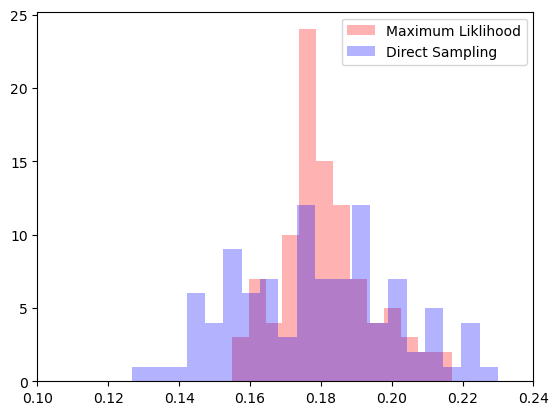

In [27]:
plt.figure()
plt.hist(ans_list, bins=20,alpha=0.3, color='r', label="Maximum Liklihood")
plt.hist(ans_list2, bins=20,alpha=0.3, color='b', label="Direct Sampling")

plt.xlim([0.1, 0.24])
plt.legend()
plt.show()


It can be confirmed that the method using maximum likelihood estimation is able to estimate the data with less variance.  
In summary, we were able to perform numerical integration by quantum amplitude estimation without quantum phase estimation.

In maximum likelihood estimation, we need to take into account the amount of computation required to maximize the likelihood function and the existence of local maxima.  
In the implementation example above, if the number of optuna's trials n_trials is reduced, the maximum likelihood estimation gets stuck in the local solution and the estimation accuracy deteriorates significantly.